In [1]:
from library.Accessor import Accessor
from library.metrics import expD, expE,expF,expG,expH,expI, avg_act_diff, compare
from library.utils import plotAcrossPredictions, plotAcrossNodes, plotDiff

2023-09-28 12:50:45.938773: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-28 12:50:46.013576: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-28 12:50:46.013594: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-09-28 12:50:46.396292: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
#Instantiate and Accessor class with a folder containing activations csv/txt

### Uncomment to use MNIST

data='mnist'
FGSM_sample = Accessor('./Adversarial/'+data+'/FGSM/'+data+'_1')
PGD_sample = Accessor('./Adversarial/'+data+'/PGD/'+data+'_1')
benign_sample = Accessor('./Benign/'+data+'/'+data+'_1')
ground_truth = Accessor('./Ground_Truth/'+data+'/'+data+'_1')

'''
### Uncomment to use CIFAR10
data='cifar10'
FGSM_sample = Accessor('./adversarial/cifar10/FGSM/cifar10_1')
PGD_sample = Accessor('./adversarial/cifar10/PGD/cifar10_1')
benign_sample = Accessor('./Benign/cifar10/cifar10_1')
ground_truth = Accessor('./Ground_truth/cifar10/cifar10_1')


### Uncomment to use Cuckoo-Traces
data='cuckoo'
FGSM_sample = Accessor('./adversarial//FGSM/')
PGD_sample = Accessor('./adversarial//PGD/')
benign_sample = Accessor('./begnign//')
ground_truth = Accessor('./Ground_truth//')

### Uncomment to use Ember
data='Ember'
FGSM_sample = Accessor('./adversarial//FGSM/')
PGD_sample = Accessor('./adversarial//PGD/')
benign_sample = Accessor('./begnign//')
ground_truth = Accessor('./Ground_truth//')
'''

"\n### Uncomment to use CIFAR10\ndata='cifar10'\nFGSM_sample = Accessor('./adversarial/cifar10/FGSM/cifar10_1')\nPGD_sample = Accessor('./adversarial/cifar10/PGD/cifar10_1')\nbenign_sample = Accessor('./Benign/cifar10/cifar10_1')\nground_truth = Accessor('./Ground_truth/cifar10/cifar10_1')\n\n\n### Uncomment to use Cuckoo-Traces\ndata='cuckoo'\nFGSM_sample = Accessor('./adversarial//FGSM/')\nPGD_sample = Accessor('./adversarial//PGD/')\nbenign_sample = Accessor('./begnign//')\nground_truth = Accessor('./Ground_truth//')\n\n### Uncomment to use Ember\ndata='Ember'\nFGSM_sample = Accessor('./adversarial//FGSM/')\nPGD_sample = Accessor('./adversarial//PGD/')\nbenign_sample = Accessor('./begnign//')\nground_truth = Accessor('./Ground_truth//')\n"

##### We use the following notations for each graph-based metric adopted for empirical characterization
 
 avg_act_diff: Compute the difference between model activations of different types of data (e.g. FGSM, Benign, etc) <br>
 ExpD : Average number of Active Nodes <br>
 ExpE : Average Activations Weight<br>
 ExpF : Always Active Nodes <br>
 ExpG : Frequency Distances<br>
 ExpH : Dispersation Index<br>
 ExpI : Entropy Index<br>

Loaded 972 Activations for Prediction : 0
Loaded 297 Activations for Prediction : 0
Loaded 435 Activations for Prediction : 0
Loaded 1001 Activations for Prediction : 0
label =  0 

the average similarity between ben and FGSM is 10.837612000402697% 
the average similarity between ben and PGD is 11.603467369305383% 
the average similarity between PGD and FGSM is 26.813539604237278% 


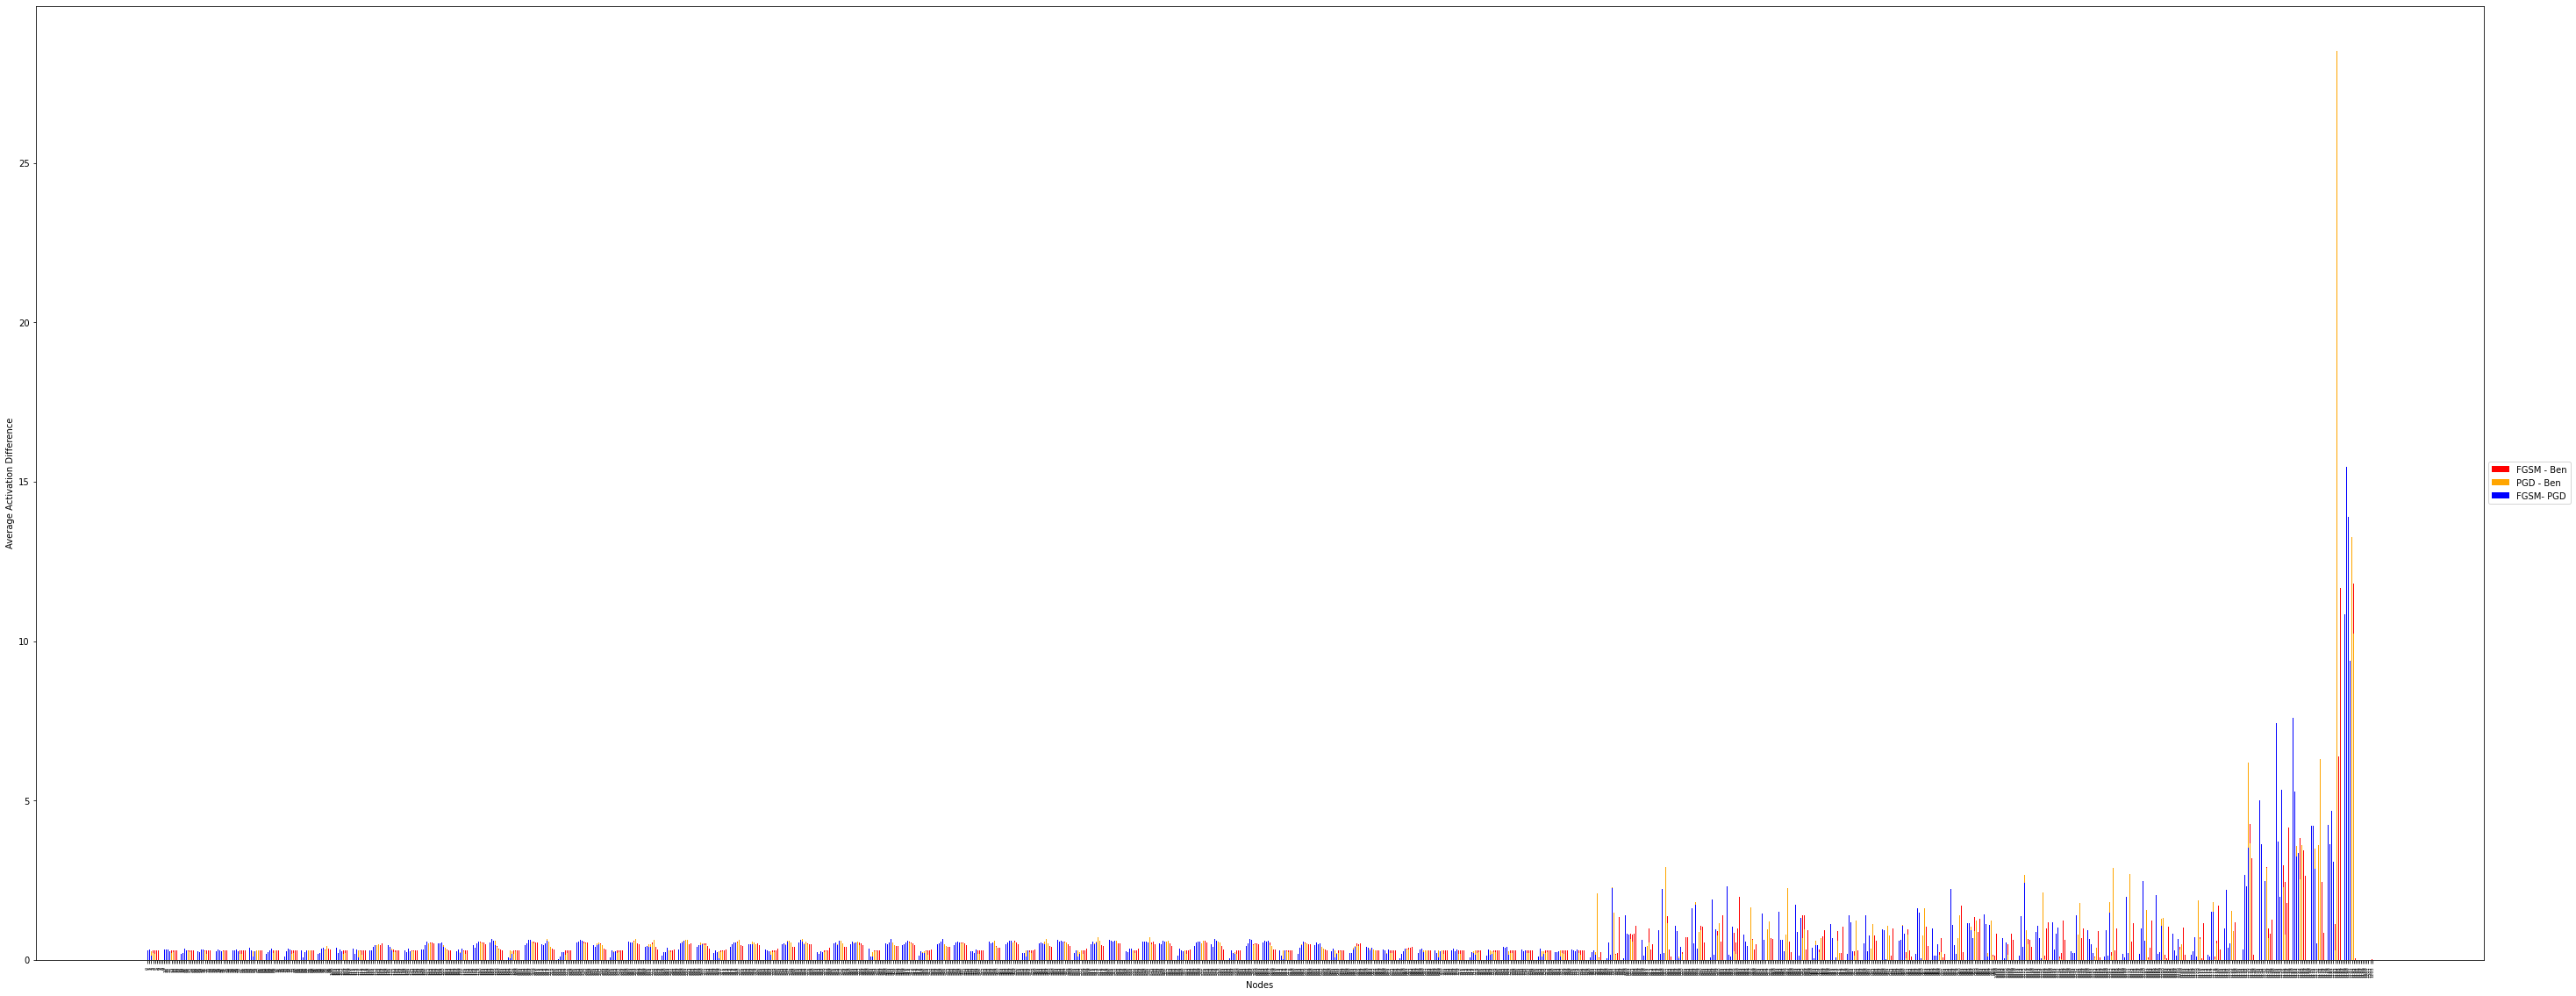

Loaded 1001 Activations for Prediction : 1
Loaded 211 Activations for Prediction : 1
Loaded 221 Activations for Prediction : 1
Loaded 1001 Activations for Prediction : 1
label =  1 

the average similarity between ben and FGSM is 8.765017083654806% 
the average similarity between ben and PGD is 9.892740638294669% 
the average similarity between PGD and FGSM is 26.870148478216365% 


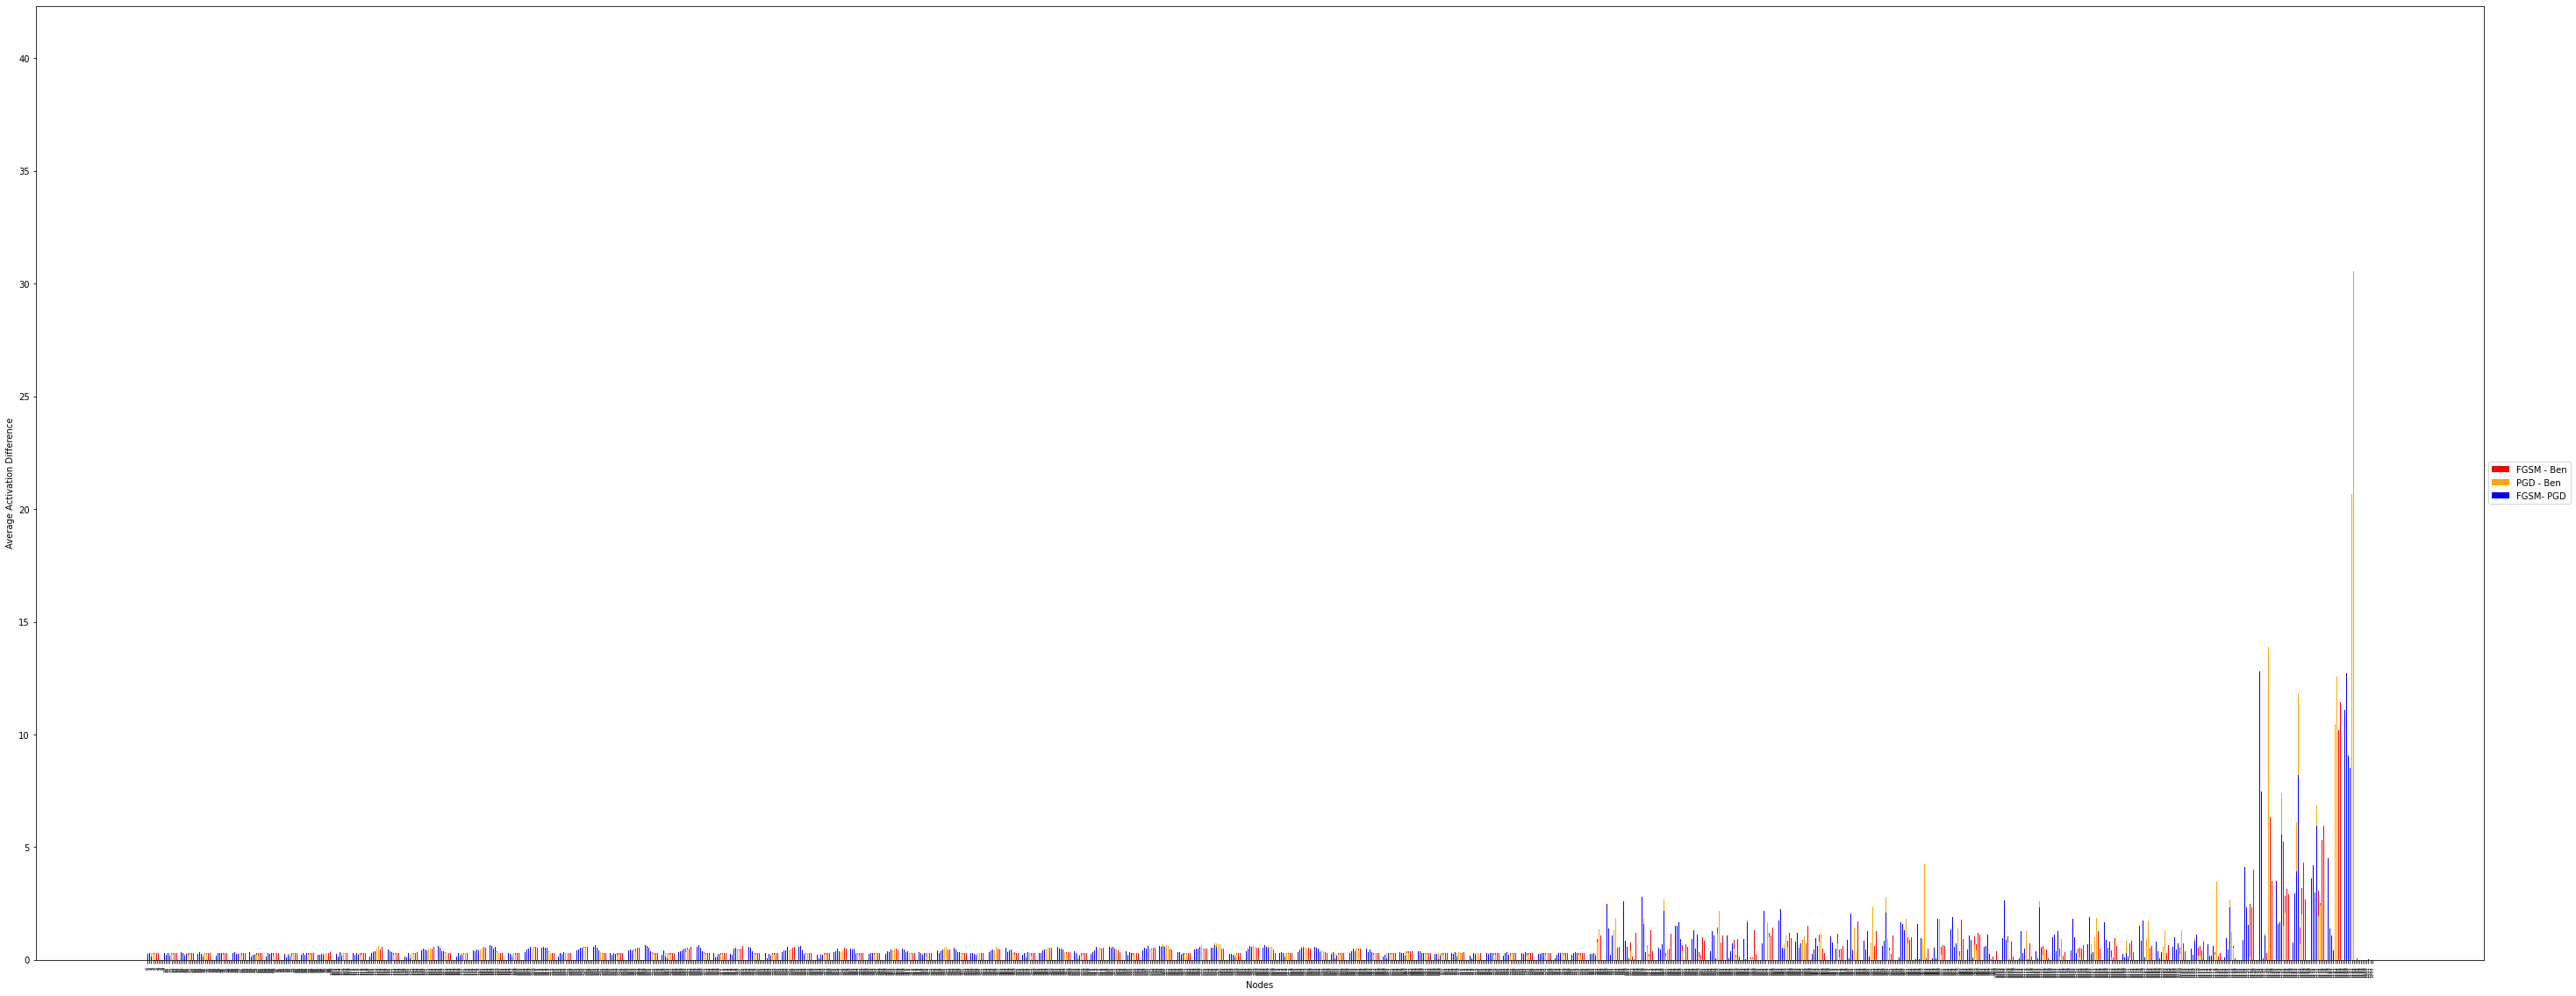

Loaded 1001 Activations for Prediction : 2
Loaded 1001 Activations for Prediction : 2
Loaded 1001 Activations for Prediction : 2
Loaded 1001 Activations for Prediction : 2
label =  2 

the average similarity between ben and FGSM is 10.223255813953562% 
the average similarity between ben and PGD is 10.977408637873847% 
the average similarity between PGD and FGSM is 30.41387043189352% 


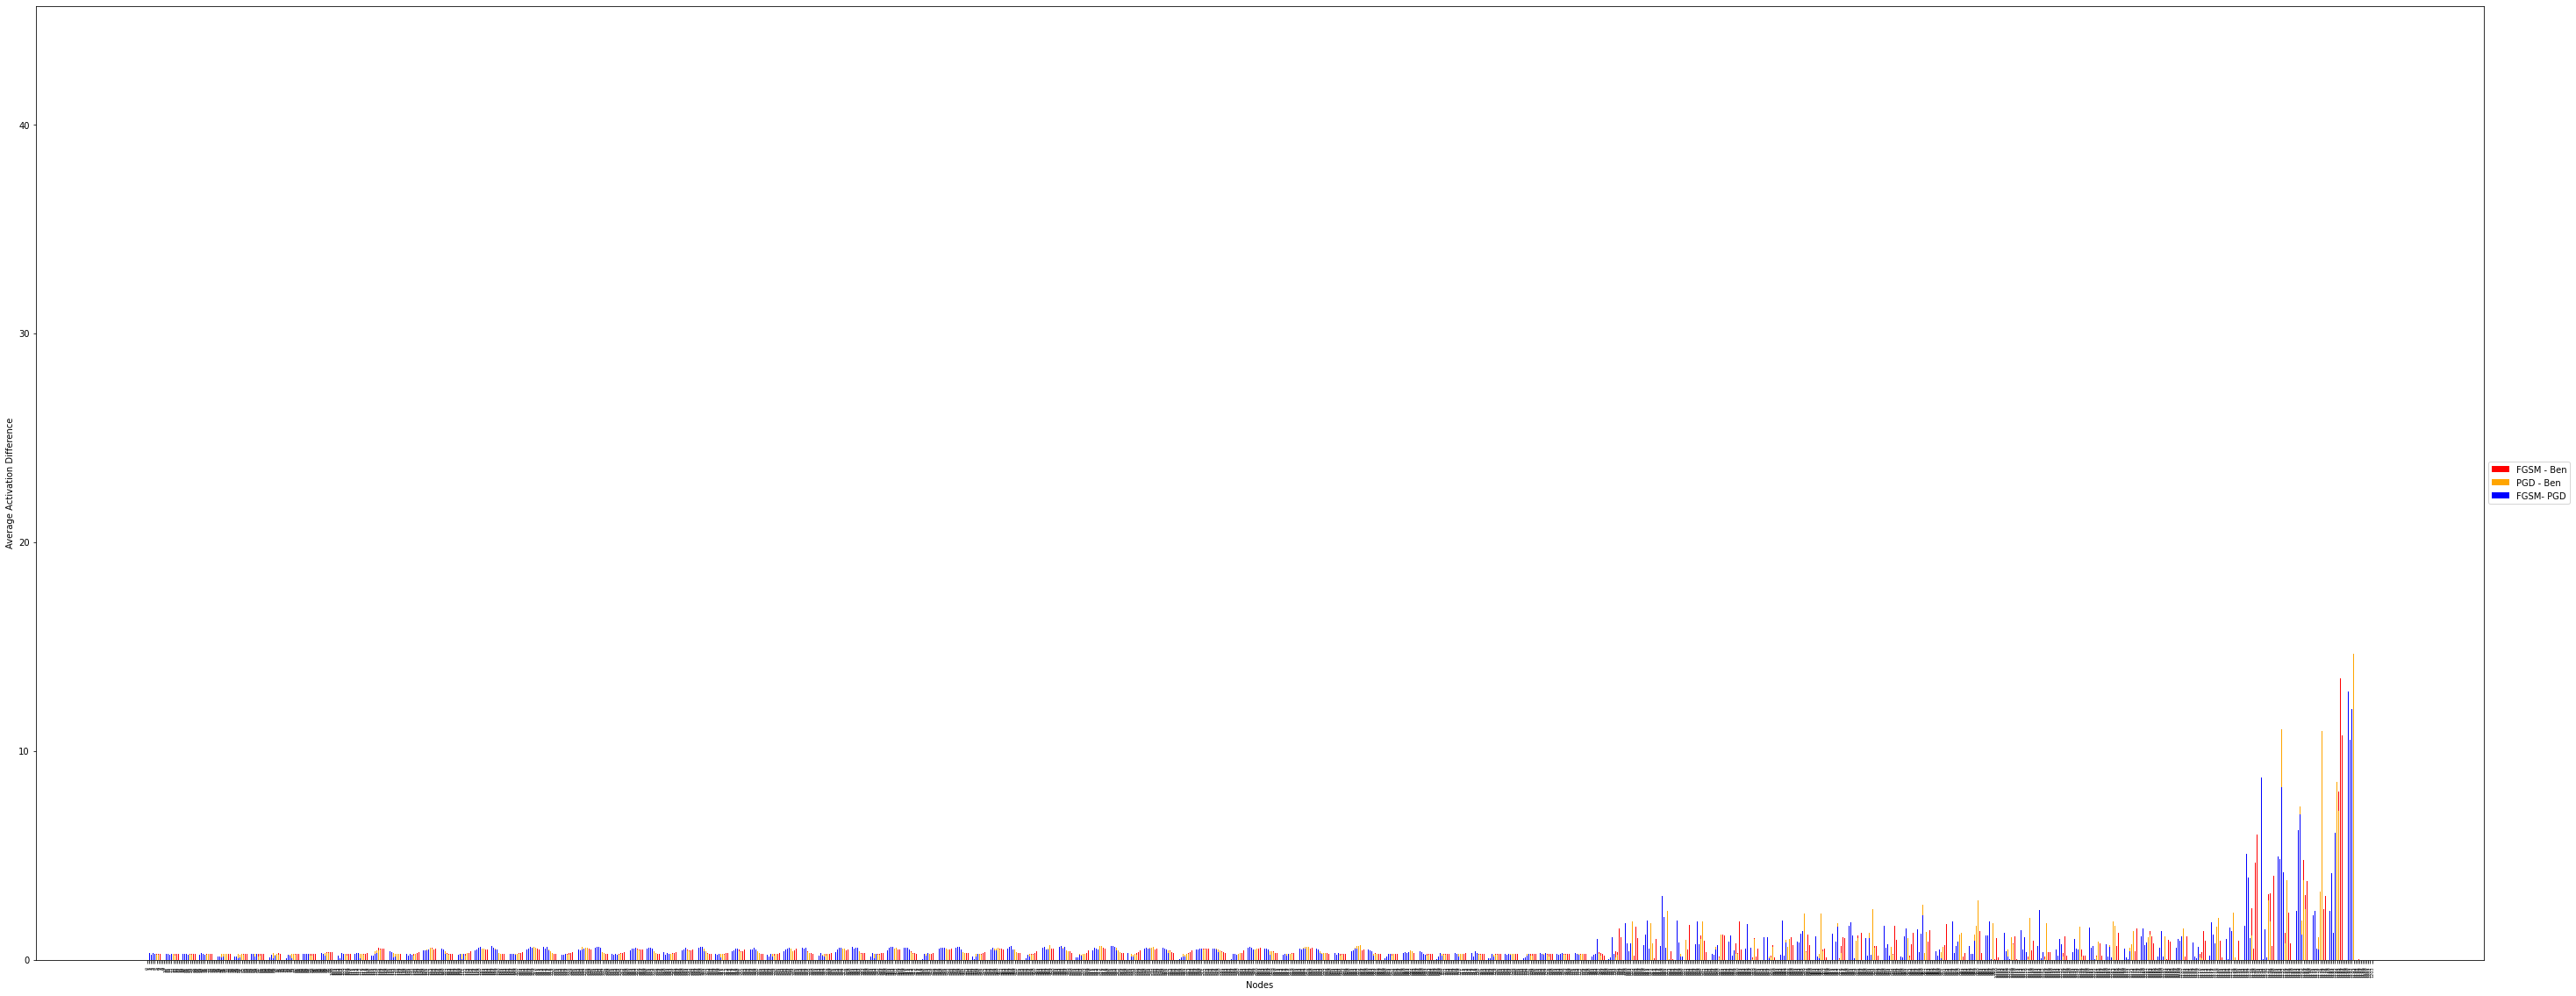

Loaded 982 Activations for Prediction : 3
Loaded 1001 Activations for Prediction : 3
Loaded 1001 Activations for Prediction : 3
Loaded 1001 Activations for Prediction : 3
label =  3 

the average similarity between ben and FGSM is 9.816734442557433% 
the average similarity between ben and PGD is 10.782117990946753% 
the average similarity between PGD and FGSM is 31.63023255813928% 


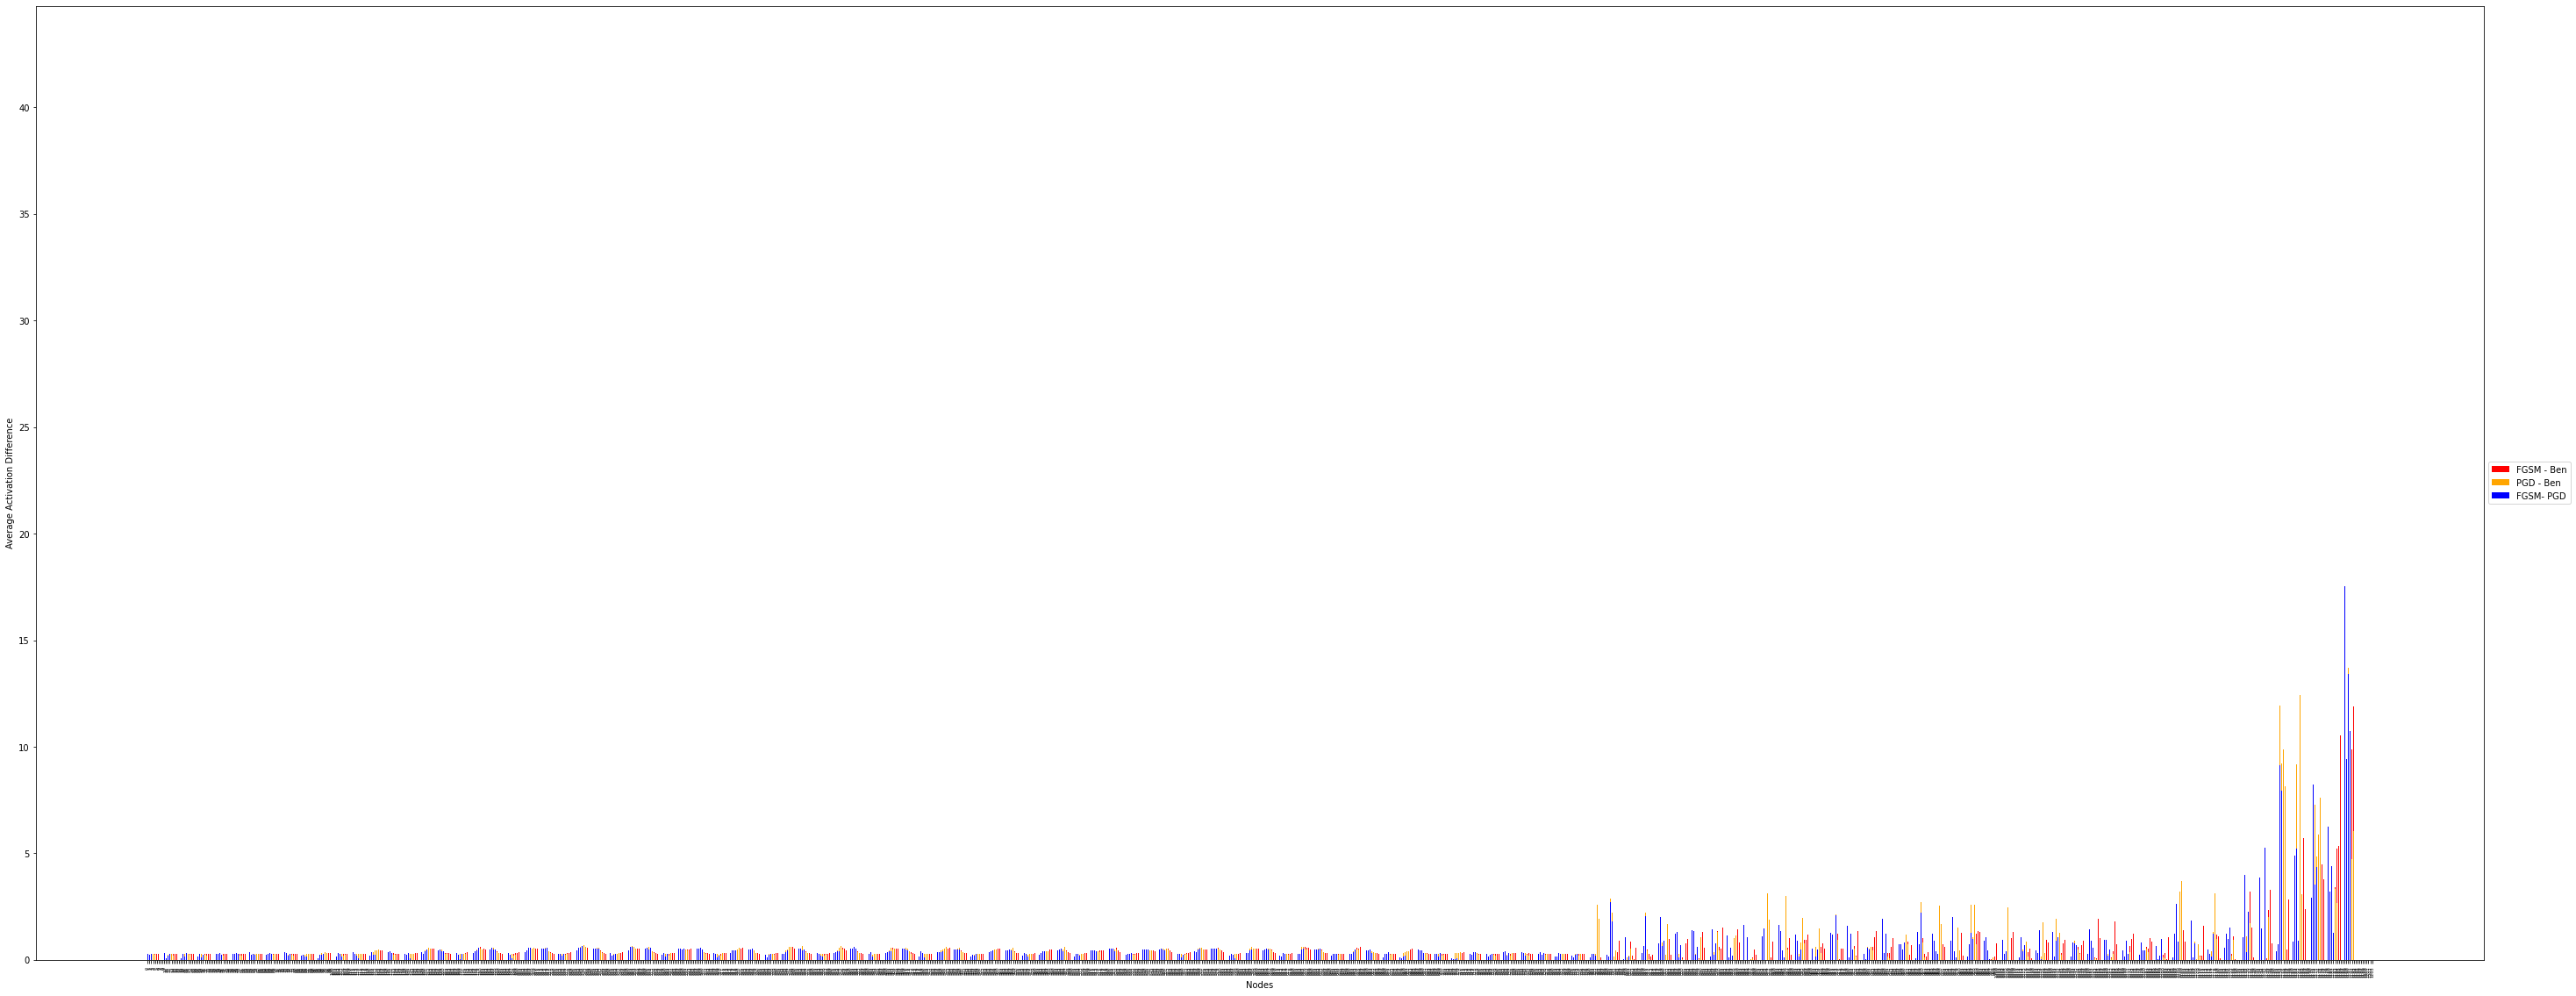

Loaded 964 Activations for Prediction : 4
Loaded 1001 Activations for Prediction : 4
Loaded 1001 Activations for Prediction : 4
Loaded 1001 Activations for Prediction : 4
label =  4 

the average similarity between ben and FGSM is 9.319643374091882% 
the average similarity between ben and PGD is 9.809883376297561% 
the average similarity between PGD and FGSM is 33.28031561461775% 


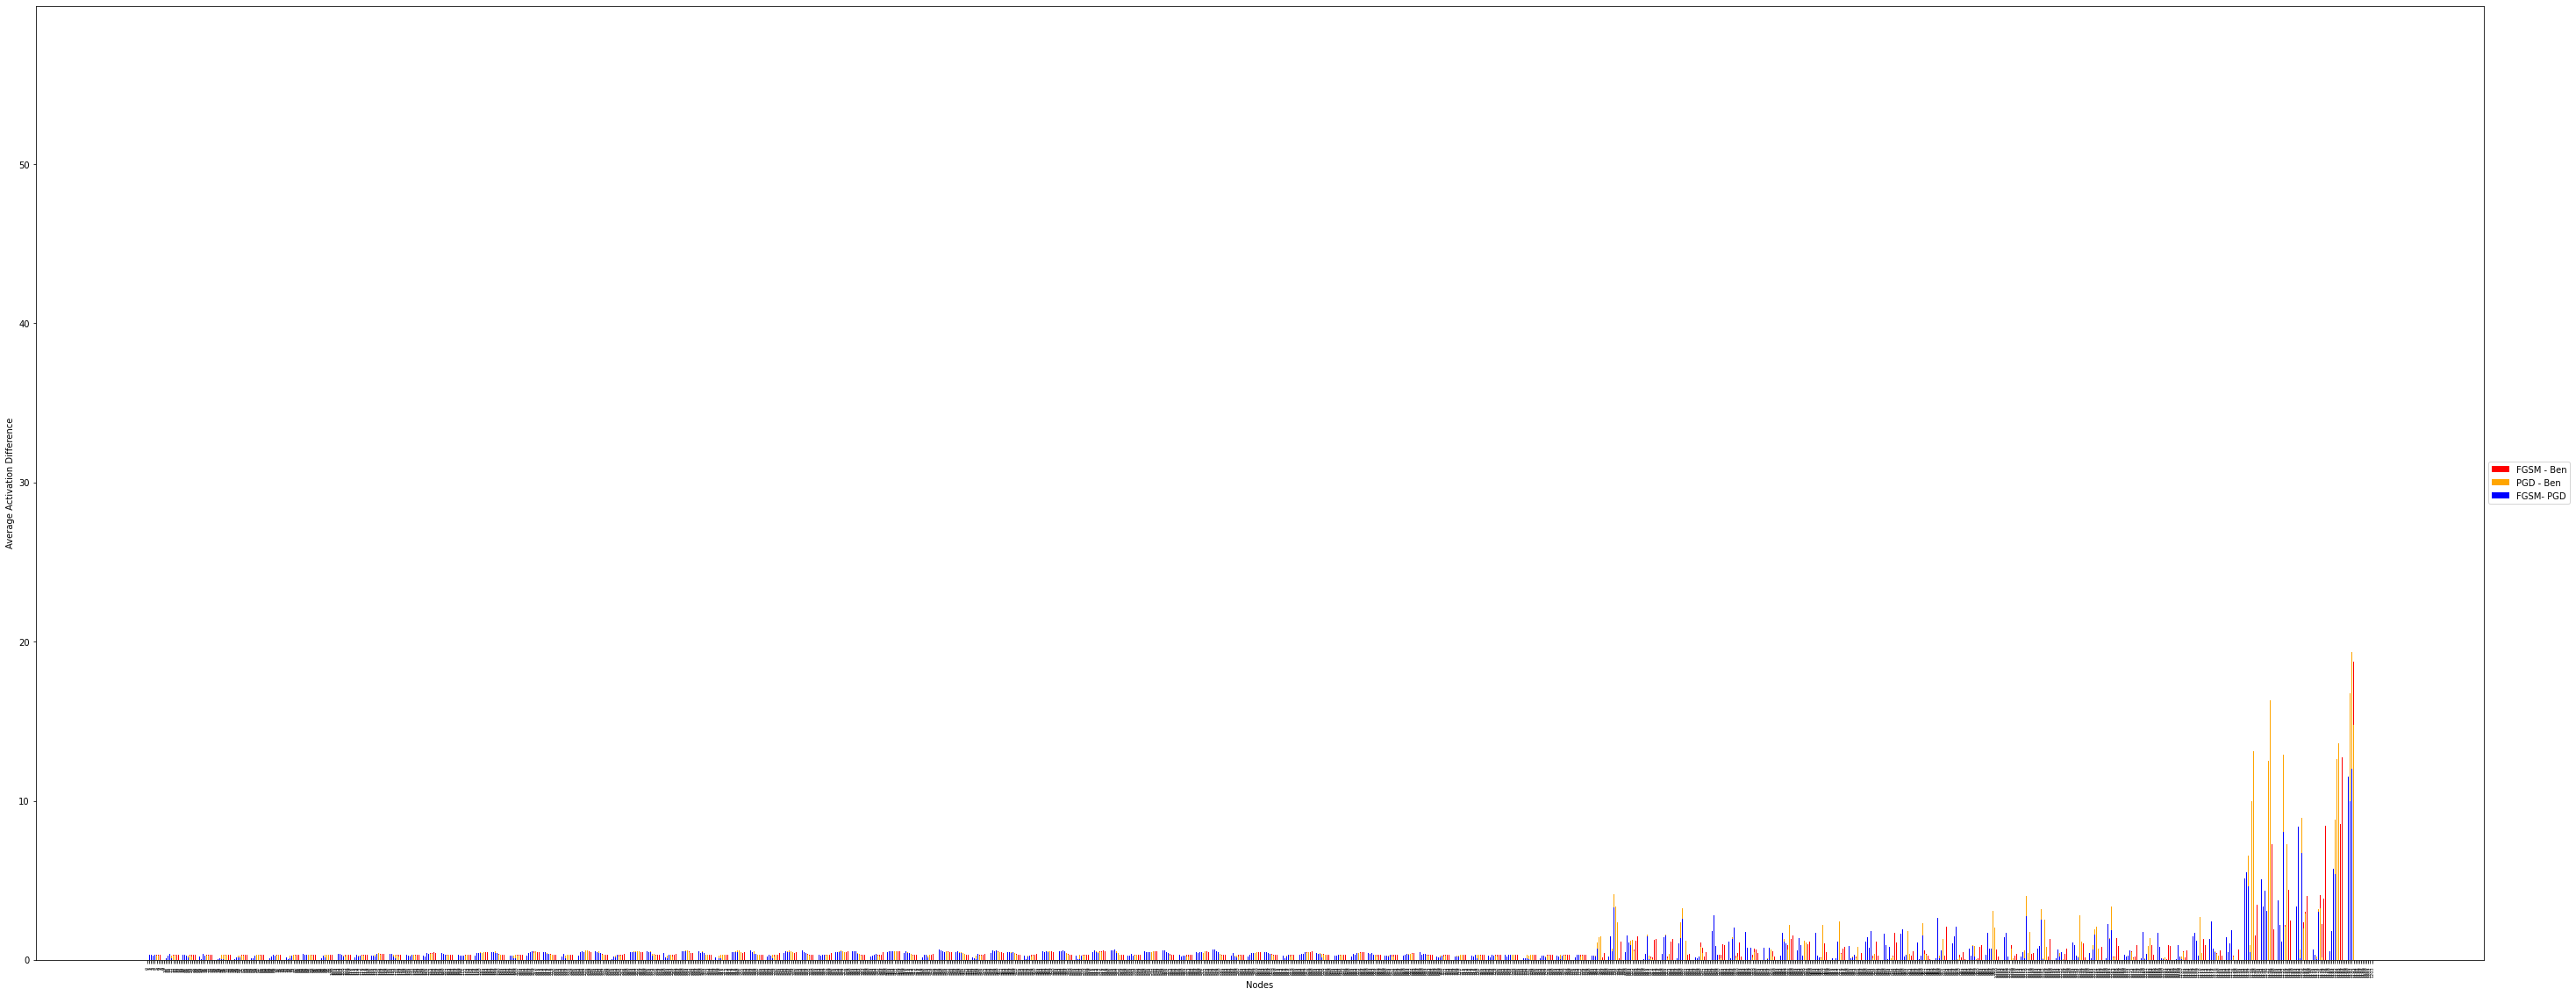

Loaded 857 Activations for Prediction : 5
Loaded 459 Activations for Prediction : 5
Loaded 416 Activations for Prediction : 5
Loaded 1001 Activations for Prediction : 5
label =  5 

the average similarity between ben and FGSM is 9.305944600062244% 
the average similarity between ben and PGD is 9.567068106312288% 
the average similarity between PGD and FGSM is 28.962153398926663% 


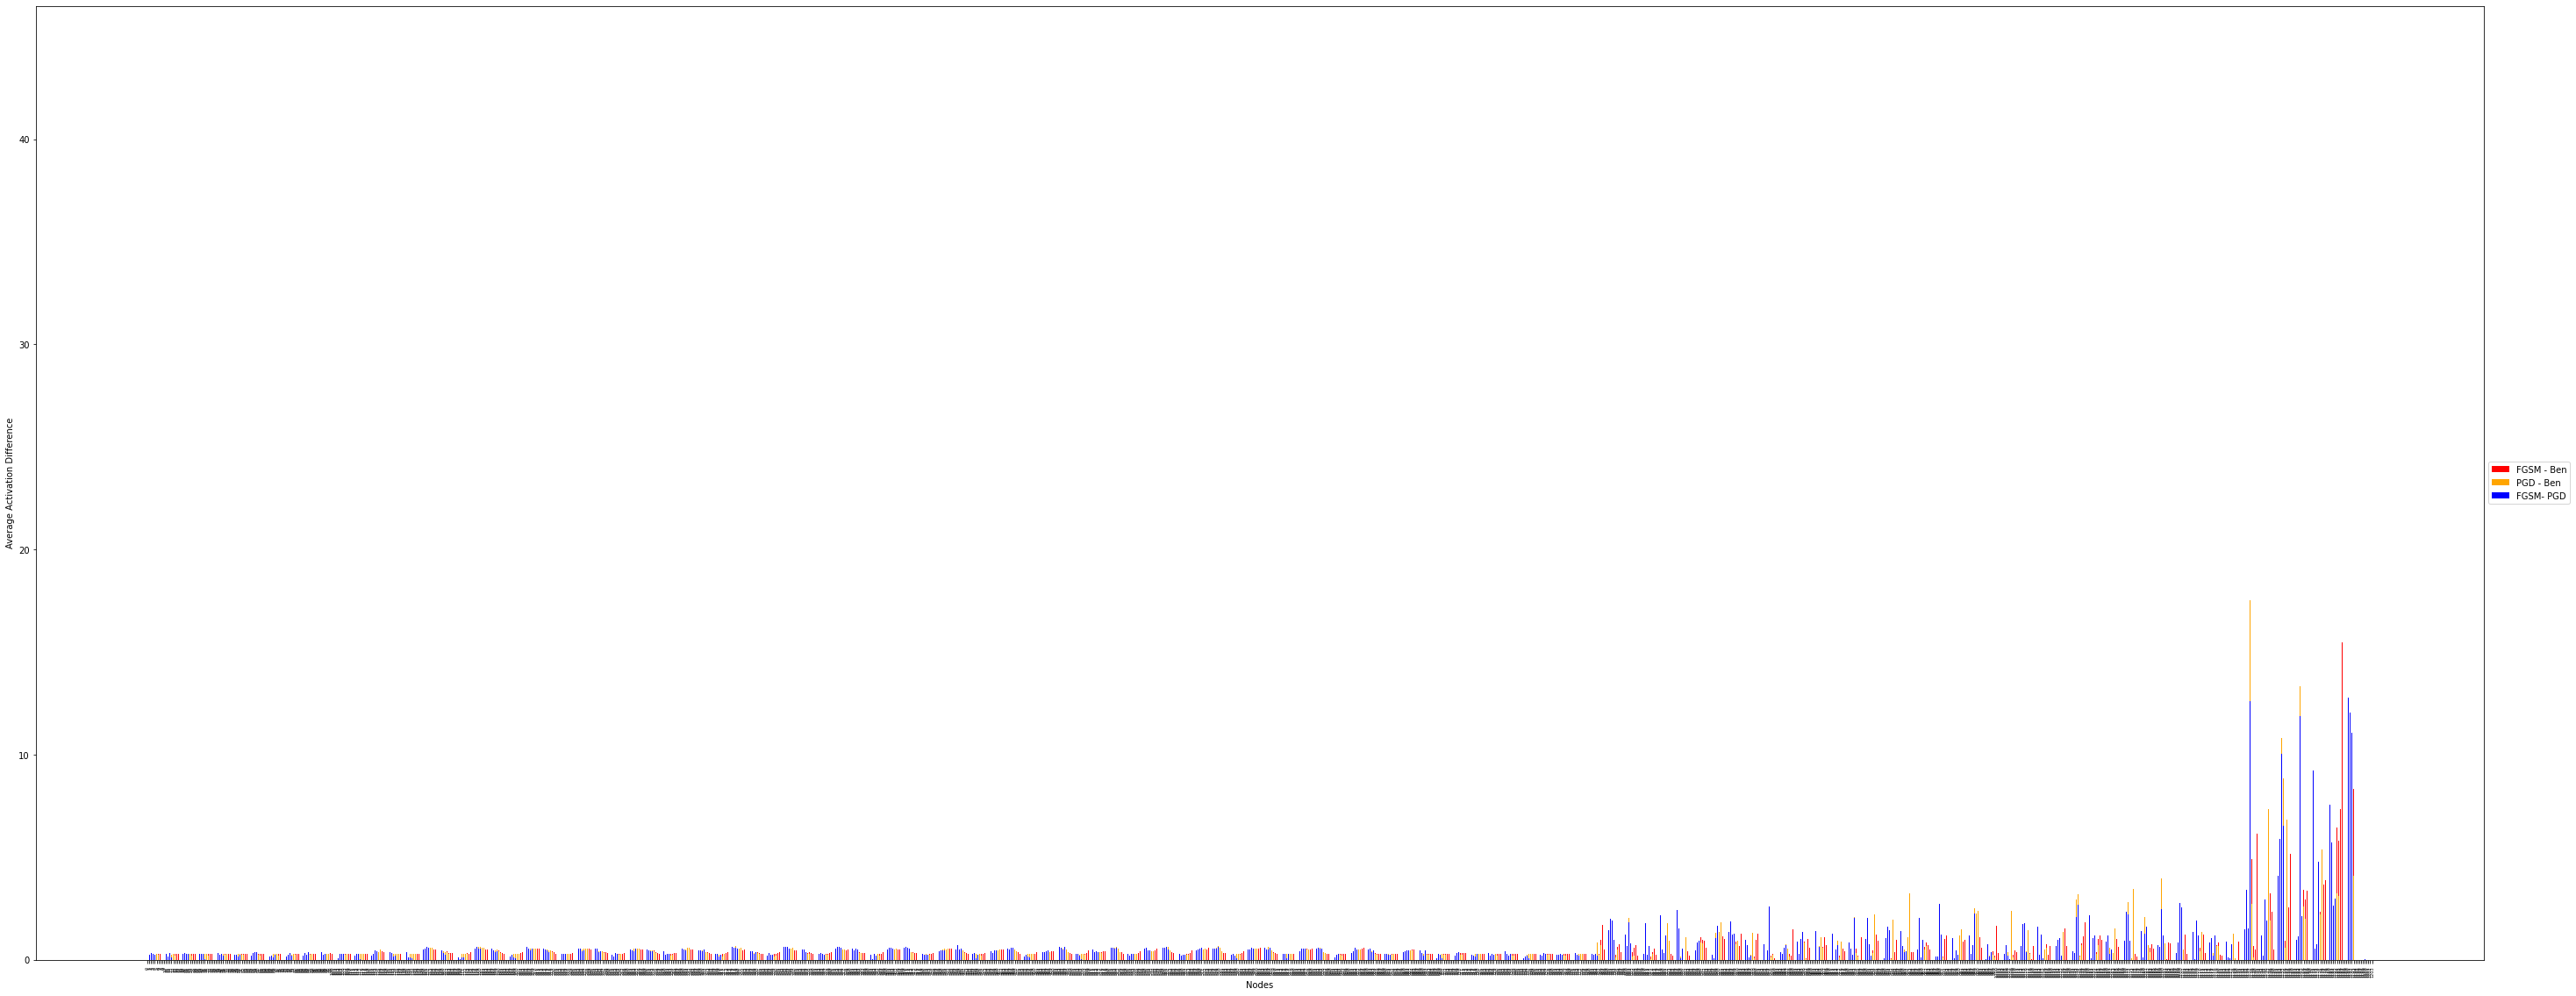

Loaded 939 Activations for Prediction : 6
Loaded 480 Activations for Prediction : 6
Loaded 460 Activations for Prediction : 6
Loaded 1001 Activations for Prediction : 6
label =  6 

the average similarity between ben and FGSM is 10.385866555924697% 
the average similarity between ben and PGD is 10.816300736674847% 
the average similarity between PGD and FGSM is 30.623465260725087% 


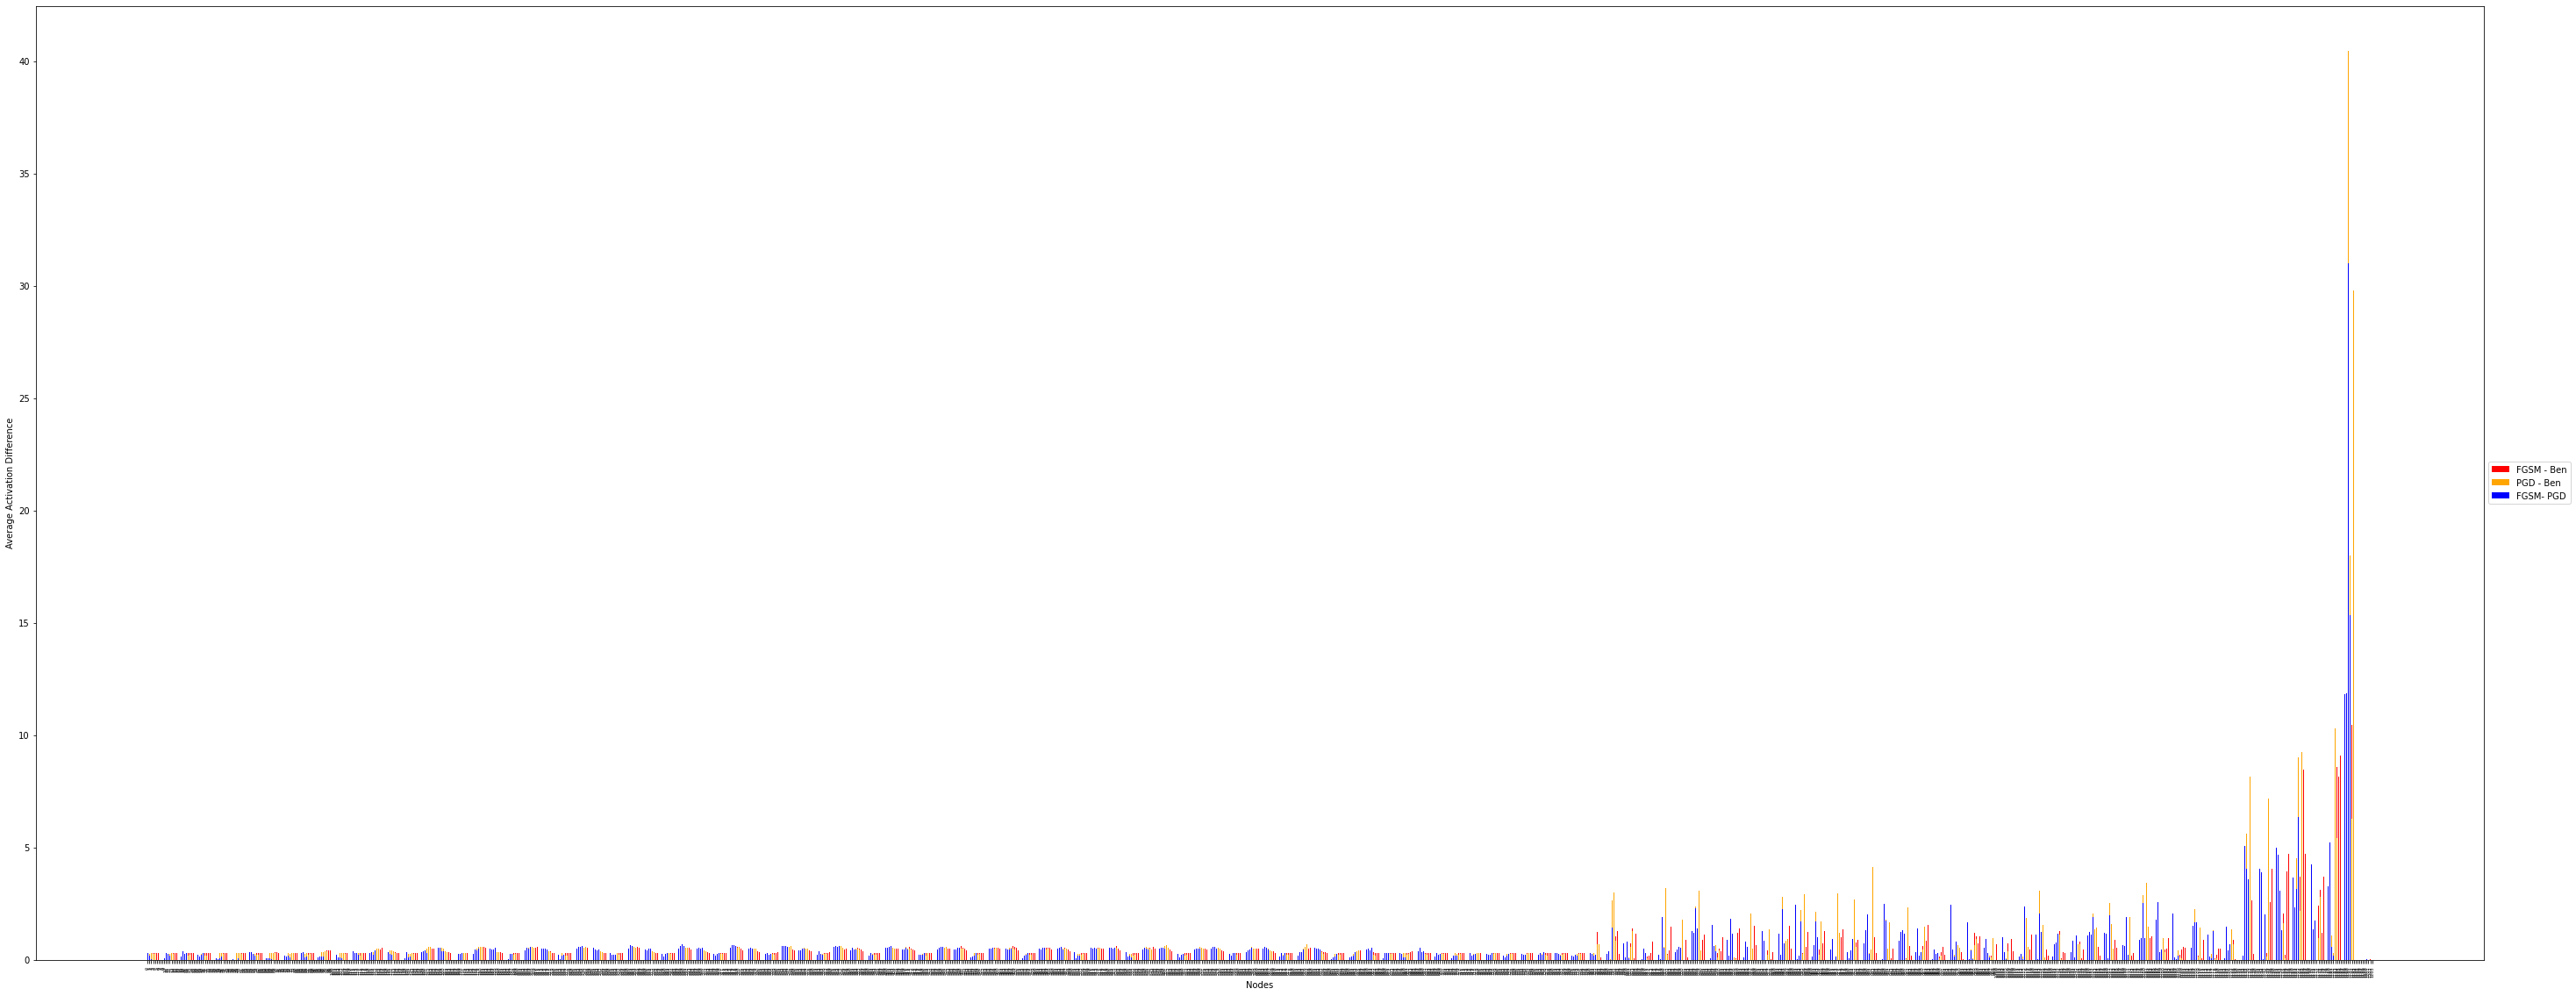

Loaded 999 Activations for Prediction : 7
Loaded 1001 Activations for Prediction : 7
Loaded 1001 Activations for Prediction : 7
Loaded 1001 Activations for Prediction : 7
label =  7 

the average similarity between ben and FGSM is 9.680444564165539% 
the average similarity between ben and PGD is 10.082757175780497% 
the average similarity between PGD and FGSM is 33.47666112956799% 


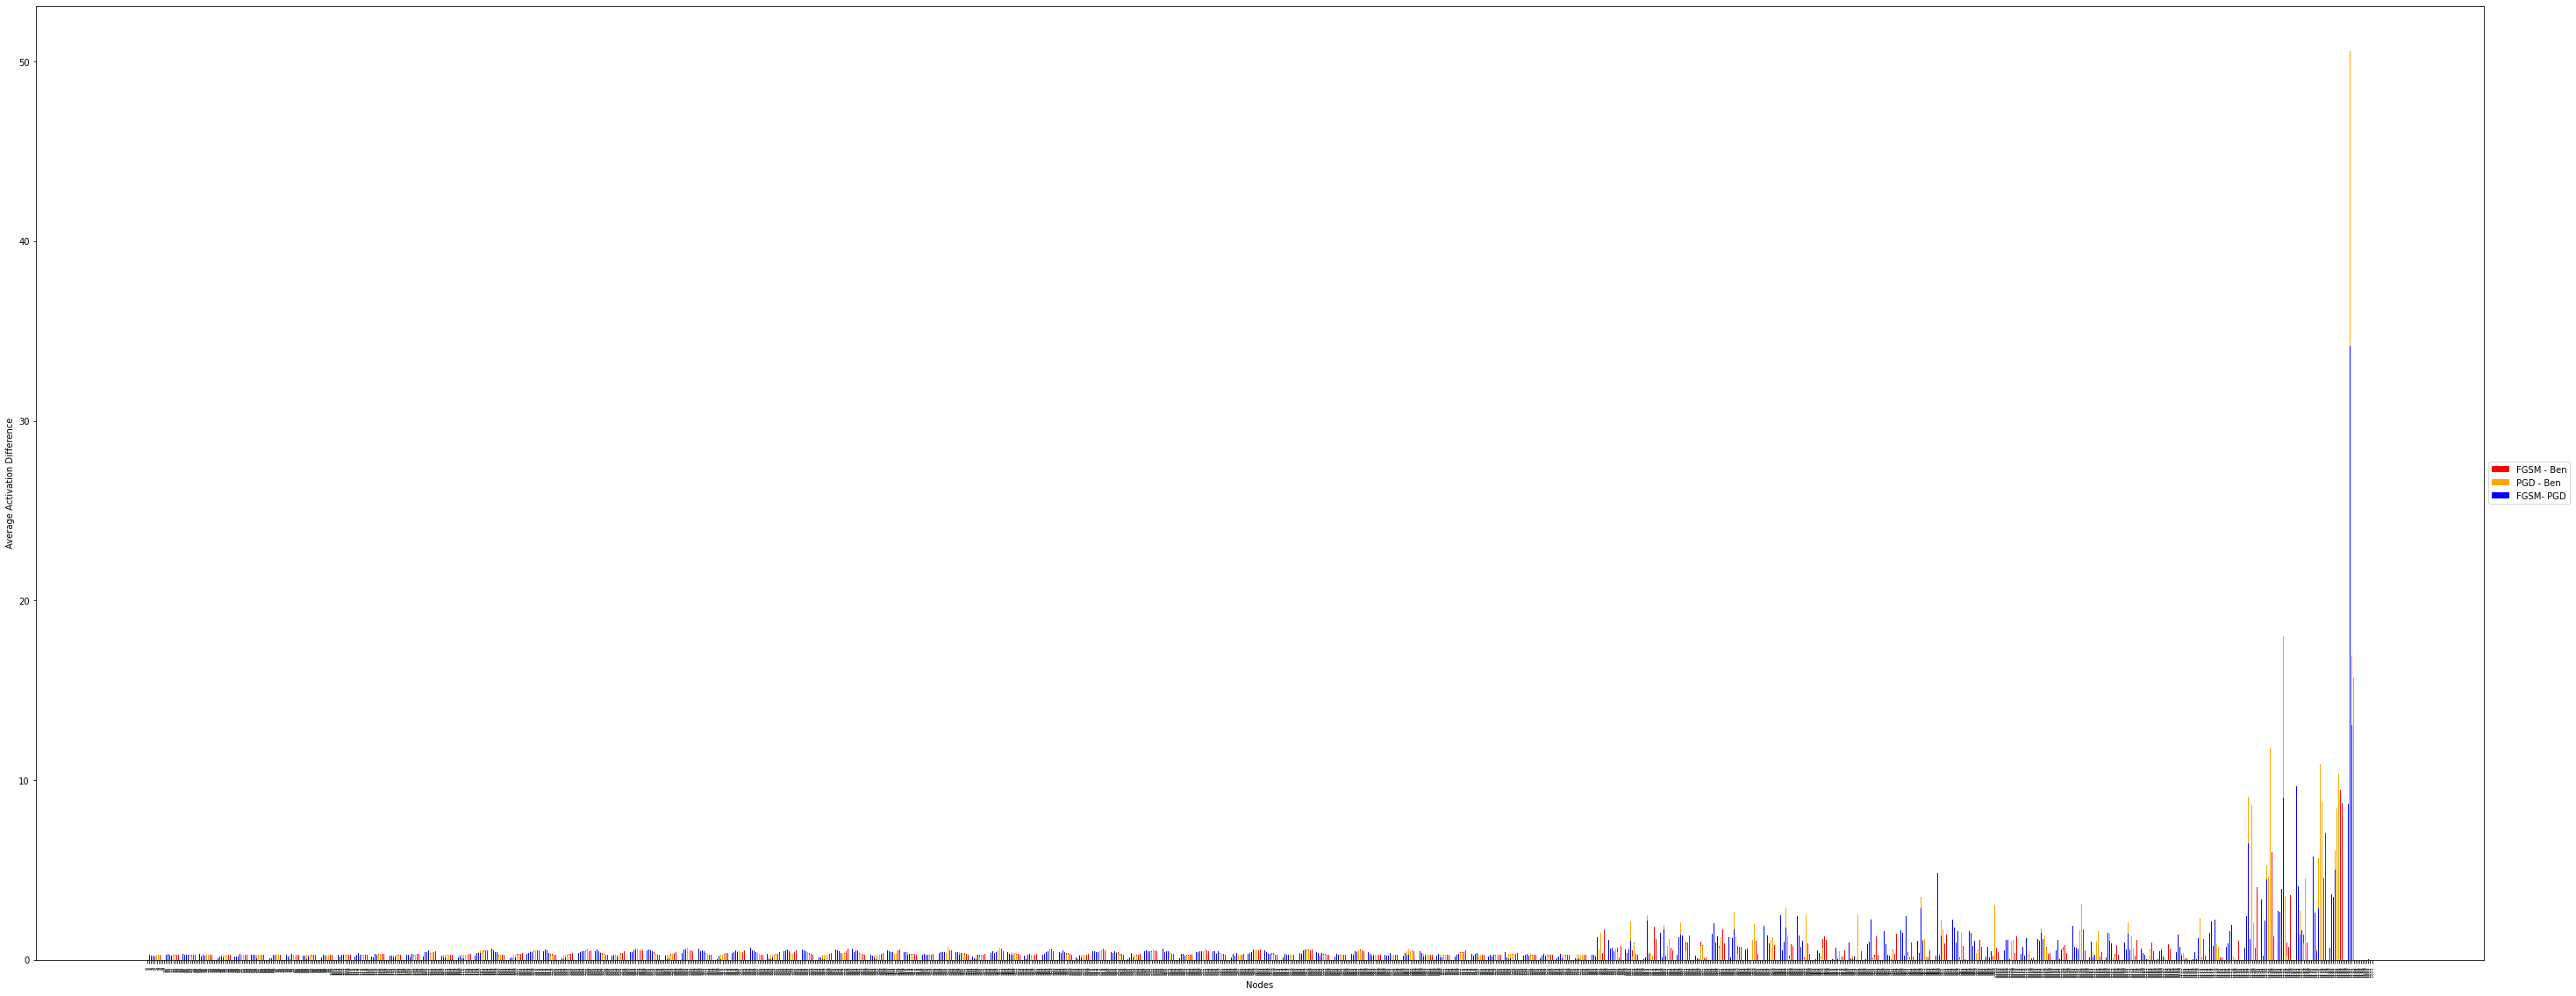

Loaded 957 Activations for Prediction : 8
Loaded 1001 Activations for Prediction : 8
Loaded 1001 Activations for Prediction : 8
Loaded 1001 Activations for Prediction : 8
label =  8 

the average similarity between ben and FGSM is 9.83850418493567% 
the average similarity between ben and PGD is 10.483862568866675% 
the average similarity between PGD and FGSM is 30.18745847176062% 


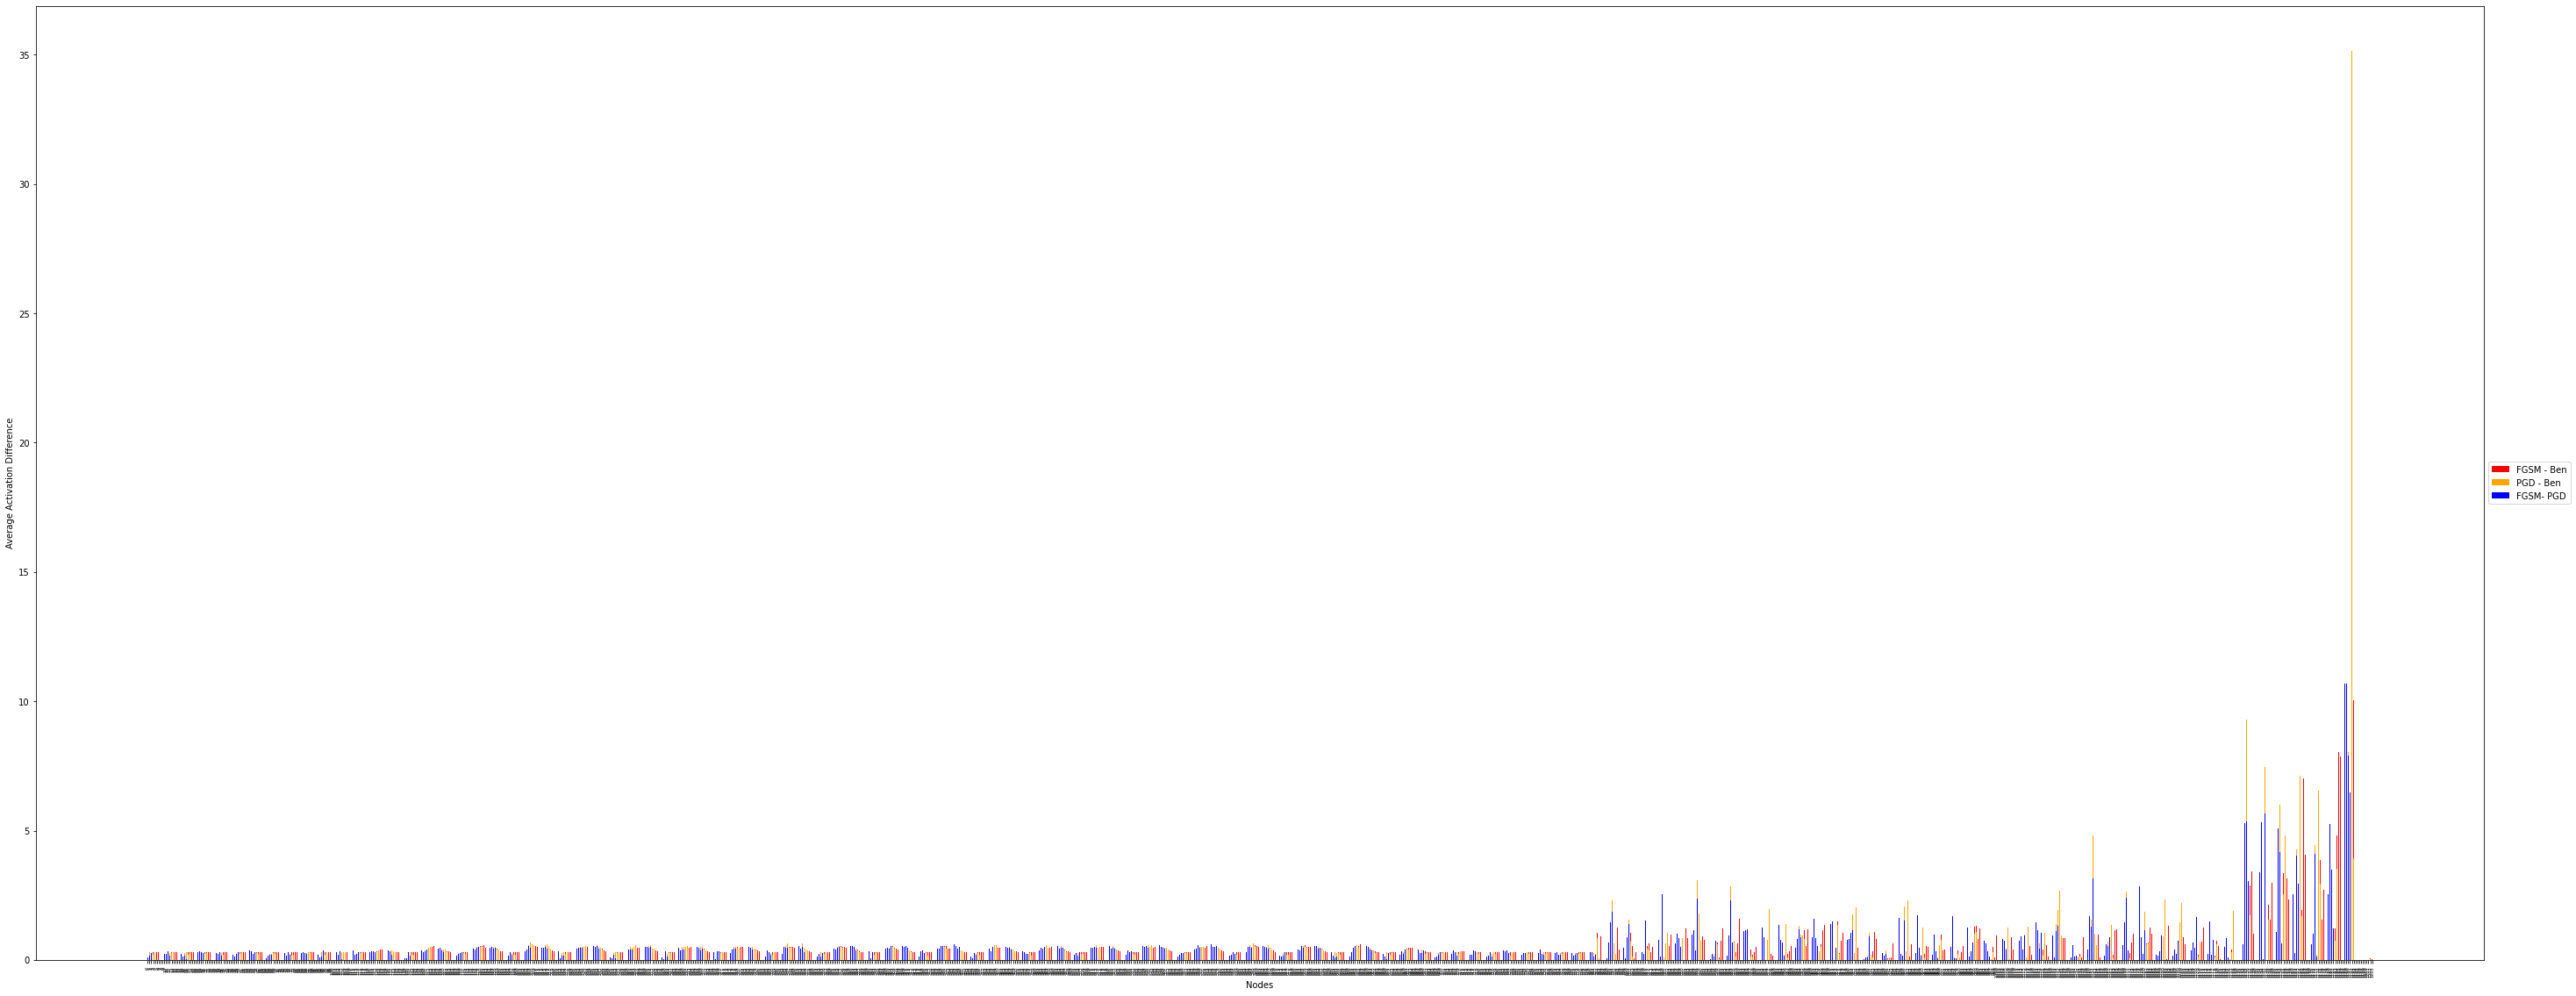

Loaded 988 Activations for Prediction : 9
Loaded 1001 Activations for Prediction : 9
Loaded 1001 Activations for Prediction : 9
Loaded 1001 Activations for Prediction : 9
label =  9 

the average similarity between ben and FGSM is 9.114187526060217% 
the average similarity between ben and PGD is 9.828910379706018% 
the average similarity between PGD and FGSM is 30.904318936876873% 


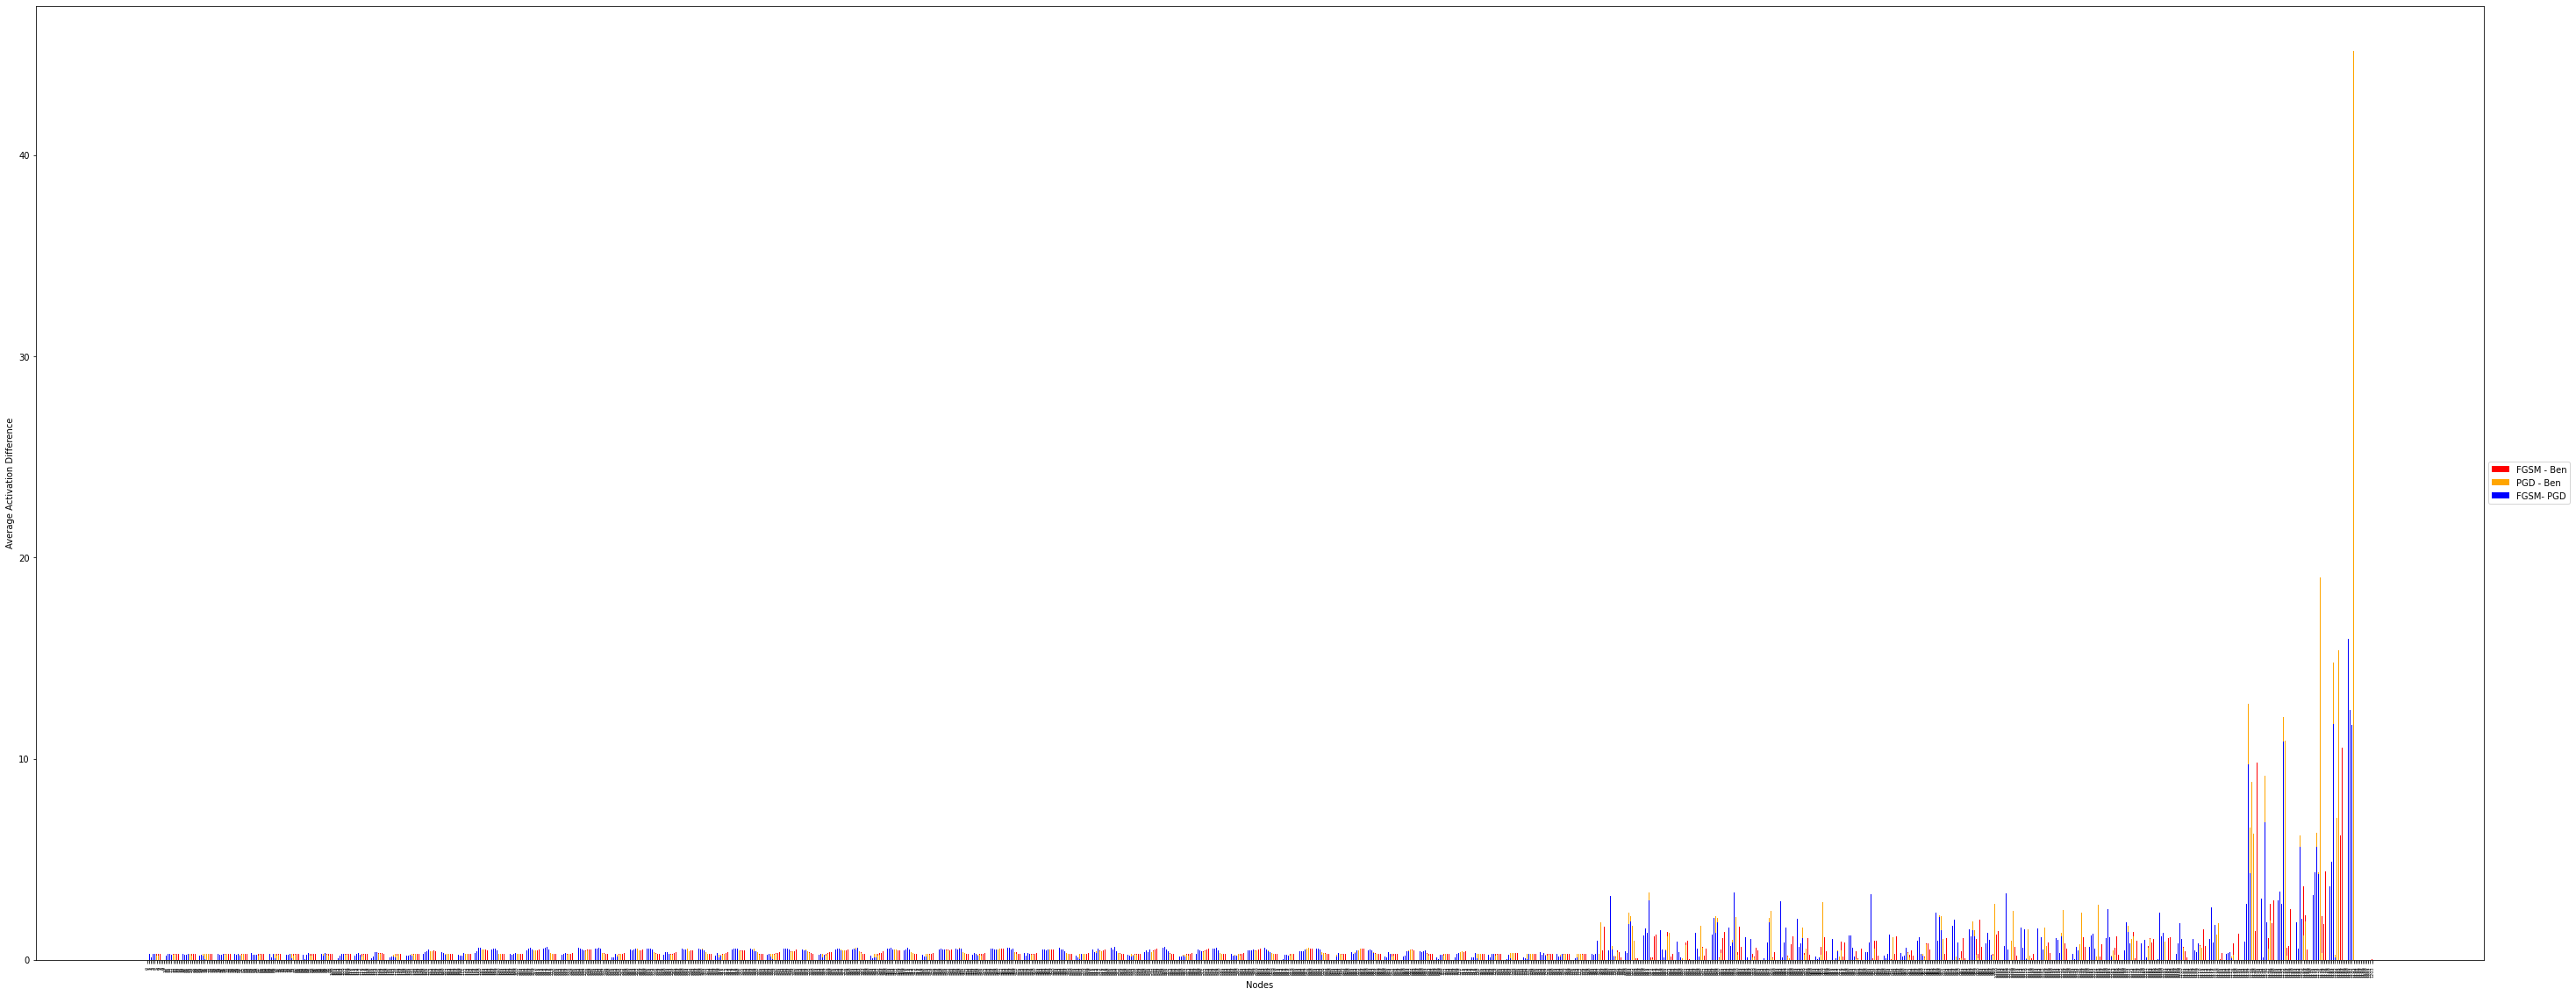

In [3]:
gt = {'D':[],'E':[],'H':[],'I':[], 'G':[] , 'F':[]}
ben = {'D':[],'E':[],'H':[],'I':[], 'G':[], 'F':[]}
FGSM={'D':[],'E':[],'H':[],'I':[], 'G':[], 'F':[]}
PGD={'D':[],'E':[],'H':[],'I':[], 'G':[], 'F':[]}

FGSM_diff=[]
PGD_diff=[]
adv_diff=[]

PRED_RANGE = 10
nb_samples=1000

for i in range(PRED_RANGE):
    
    ## Loading activations by prediction
    benign_sample_act = benign_sample.get_label_by_prediction(target_prediction=i,limit=nb_samples)   
    FGSM_sample_act = FGSM_sample.get_label_by_prediction(target_prediction=i,limit=nb_samples)
    PGD_sample_act = PGD_sample.get_label_by_prediction(target_prediction=i,limit=nb_samples)
    ground_truth_act = ground_truth.get_label_by_prediction(target_prediction=i,limit=nb_samples)
    
    print('label = ',i,'\n')
    print("the average similarity between ben and FGSM is {}% ".format(compare(benign_sample_act, FGSM_sample_act,nb_sample=nb_samples)))
    print("the average similarity between ben and PGD is {}% ".format(compare(benign_sample_act, PGD_sample_act,nb_sample=nb_samples)))
    print("the average similarity between PGD and FGSM is {}% ".format(compare(FGSM_sample_act, PGD_sample_act,nb_sample=nb_samples)))
    
    FGSM_diff.append(avg_act_diff(benign_sample_act,FGSM_sample_act,nb_sample=nb_samples))
    PGD_diff.append(avg_act_diff(benign_sample_act,PGD_sample_act,nb_sample=nb_samples))
    adv_diff.append(avg_act_diff(FGSM_sample_act,PGD_sample_act,nb_sample=nb_samples))
    plotDiff(FGSM_diff[i],PGD_diff[i],adv_diff[i],Node_range=len(FGSM_diff[i]),data=data,label=i)
    
    gt['D'].append(expD(ground_truth_act))
    ben['D'].append(expD(benign_sample_act))
    FGSM['D'].append(expD(FGSM_sample_act))
    PGD['D'].append(expD(PGD_sample_act))
    
    gt['E'].append(expE(ground_truth_act))
    ben['E'].append(expE(benign_sample_act))
    FGSM['E'].append(expE(FGSM_sample_act))
    PGD['E'].append(expE(PGD_sample_act))
    
    gt['H'].append(expH(ground_truth_act))
    ben['H'].append(expH(benign_sample_act))
    FGSM['H'].append(expH(FGSM_sample_act))
    PGD['H'].append(expH(PGD_sample_act))
    
    gt['I'].append(expI(ground_truth_act))
    ben['I'].append(expI(benign_sample_act))
    FGSM['I'].append(expI(FGSM_sample_act))
    PGD['I'].append(expI(PGD_sample_act))
    
    gt['G'].append(list(expG(ground_truth_act)))
    ben['G'].append(list(expG(benign_sample_act)))
    FGSM['G'].append(list(expG(FGSM_sample_act)))
    PGD['G'].append(list(expG(PGD_sample_act)))
    
    gt['F'].append(expF(ground_truth_act))
    ben['F'].append(expF(benign_sample_act))
    FGSM['F'].append(expF(FGSM_sample_act))
    PGD['F'].append(expF(PGD_sample_act))

## The Average Number of Active Nodes

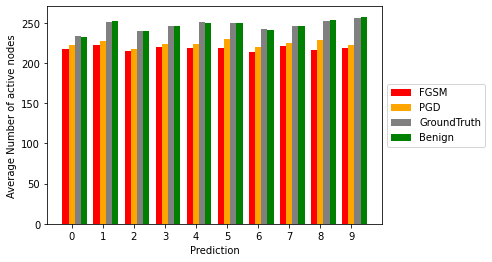

In [4]:
adv=[FGSM['D'], PGD['D']]
plotAcrossPredictions(gt['D'],'Average Number of active nodes',ben['D'],adv,PRED_RANGE,data)

## The Always Active Nodes

**Overall labels**

In [5]:
gt_overall = set([item for sublist in gt['F'] for item in sublist])
ben_overall = set([item for sublist in ben['F'] for item in sublist])
FGSM_overall = set([item for sublist in FGSM['F'] for item in sublist])
PGD_overall = set([item for sublist in PGD['F'] for item in sublist])


print('GT: ',gt_overall,'\n')
print('Ben: ',ben_overall,'\n')
print('FGSM: ',FGSM_overall,'\n')
print('PGD: ',PGD_overall,'\n')

GT:  {0, 8, 18, 48, 57, 68, 69, 81, 89, 102, 110, 112, 114, 126, 130, 162, 173, 192, 204, 207, 218, 219, 222, 224, 237, 246, 249, 281, 300, 309, 314, 328, 340, 347, 350, 351, 352, 356, 357, 358, 359, 361, 363, 364, 366, 367, 368, 369, 371, 372, 374, 376, 378, 379, 380, 381, 382, 383, 384, 386, 387, 388, 390, 391, 393, 394, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419} 

Ben:  {0, 8, 18, 44, 48, 51, 52, 57, 68, 69, 81, 89, 90, 93, 102, 110, 111, 112, 114, 118, 126, 127, 130, 134, 143, 151, 162, 173, 192, 204, 207, 219, 222, 224, 237, 246, 249, 300, 307, 309, 314, 328, 340, 347, 350, 351, 352, 353, 356, 357, 358, 359, 361, 363, 364, 365, 366, 367, 368, 369, 371, 373, 374, 376, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 390, 391, 392, 393, 394, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419} 

FGSM:  {0, 384, 386, 391, 397, 400, 401,

**Intersection overall all labels**

In [6]:
print('Intersection between {} and {} : {}'.format('GT','ben',[value for value in gt_overall if value in ben_overall]),'\n')
print('Intersection between {} and {} : {}'.format('GT','FGSM',[value for value in gt_overall if value in FGSM_overall]),'\n')
print('Intersection between {} and {} : {}'.format('GT','PGD',[value for value in gt_overall if value in PGD_overall]),'\n')
print('Intersection between {} and {} : {}'.format('FGSM','PGD',[value for value in FGSM_overall if value in PGD_overall]),'\n')
print('Intersection between {} and {} : {}'.format('FGSM','ben',[value for value in FGSM_overall if value in ben_overall]),'\n')
print('Intersection between {} and {} : {}'.format('ben','PGD',[value for value in ben_overall if value in PGD_overall]),'\n')

Intersection between GT and ben : [0, 8, 18, 48, 57, 68, 69, 81, 89, 102, 110, 112, 114, 126, 130, 162, 173, 192, 204, 207, 219, 222, 224, 237, 246, 249, 300, 309, 314, 328, 340, 347, 350, 351, 352, 356, 357, 358, 359, 361, 363, 364, 366, 367, 368, 369, 371, 374, 376, 378, 379, 380, 381, 382, 383, 384, 386, 387, 388, 390, 391, 393, 394, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419] 

Intersection between GT and FGSM : [0, 69, 114, 126, 173, 204, 219, 300, 328, 357, 358, 363, 364, 367, 368, 371, 376, 381, 382, 383, 384, 386, 391, 397, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419] 

Intersection between GT and PGD : [0, 8, 18, 48, 57, 68, 69, 81, 89, 102, 110, 112, 114, 126, 130, 162, 173, 192, 204, 207, 218, 219, 222, 224, 237, 246, 249, 281, 300, 309, 328, 340, 347, 350, 351, 352, 356, 357, 358, 359, 361, 363, 364, 366, 367, 368, 369, 371, 372, 374, 376, 378, 

**Intersection per label**

In [7]:
for label in range(PRED_RANGE):
    print('Prediction = {}:\n'.format(label))
    print('Intersection between {} and {} : {}'.format('GT','ben',[value for value in gt['F'][label] if value in ben['F'][label]]),'\n')
    print('Intersection between {} and {} : {}'.format('GT','FGSM',[value for value in gt['F'][label] if value in FGSM['F'][label]]),'\n')
    print('Intersection between {} and {} : {}'.format('GT','PGD',[value for value in gt['F'][label]if value in PGD['F'][label]]),'\n')
    print('Intersection between {} and {} : {}'.format('FGSM','PGD',[value for value in FGSM['F'][label] if value in PGD['F'][label]]),'\n')
    print('Intersection between {} and {} : {}'.format('FGSM','ben',[value for value in FGSM['F'][label] if value in ben['F'][label]]),'\n')
    print('Intersection between {} and {} : {}'.format('ben','PGD',[value for value in ben['F'][label] if value in PGD['F'][label]]),'\n')
    print('\n')

Prediction = 0:

Intersection between GT and ben : [8, 57, 68, 89, 204, 340, 356, 357, 367, 368, 376, 380, 384, 391, 396, 397, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419] 

Intersection between GT and FGSM : [367, 376, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 416, 417, 418, 419] 

Intersection between GT and PGD : [8, 57, 68, 204, 340, 356, 357, 367, 368, 374, 376, 384, 391, 396, 397, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 416, 417, 418, 419] 

Intersection between FGSM and PGD : [300, 367, 376, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 416, 417, 418, 419] 

Intersection between FGSM and ben : [300, 367, 376, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 416, 417, 418, 419] 

Intersection between ben and PGD : [8, 57, 68, 173, 204, 300, 340, 352, 356, 357, 366, 367, 368, 376, 384, 387, 391, 396, 397, 

**Number of always active nodes per label**

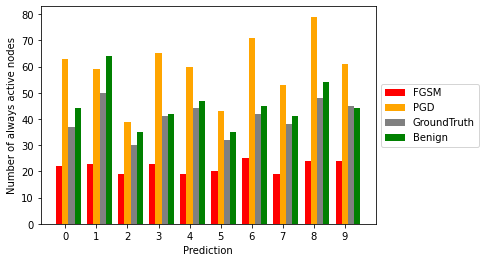

In [8]:
Nb_gt=[]
Nb_ben=[]
Nb_FGSM=[]
Nb_PGD=[]

for val in gt['F']:
    Nb_gt.append(len(val))
    
for val in ben['F']:
    Nb_ben.append(len(val))
    
for val in FGSM['F']:
    Nb_FGSM.append(len(val))
    
for val in PGD['F']:
    Nb_PGD.append(len(val))
    
adv=[Nb_FGSM, Nb_PGD]

plotAcrossPredictions(Nb_gt,'Number of always active nodes',Nb_ben,adv,PRED_RANGE,data)

## The Node activation frequency
### The distance between the activation frequency of GT compared to FGSM, PGD and Benign respectively:

Label=  0
Number of Nodes:  420


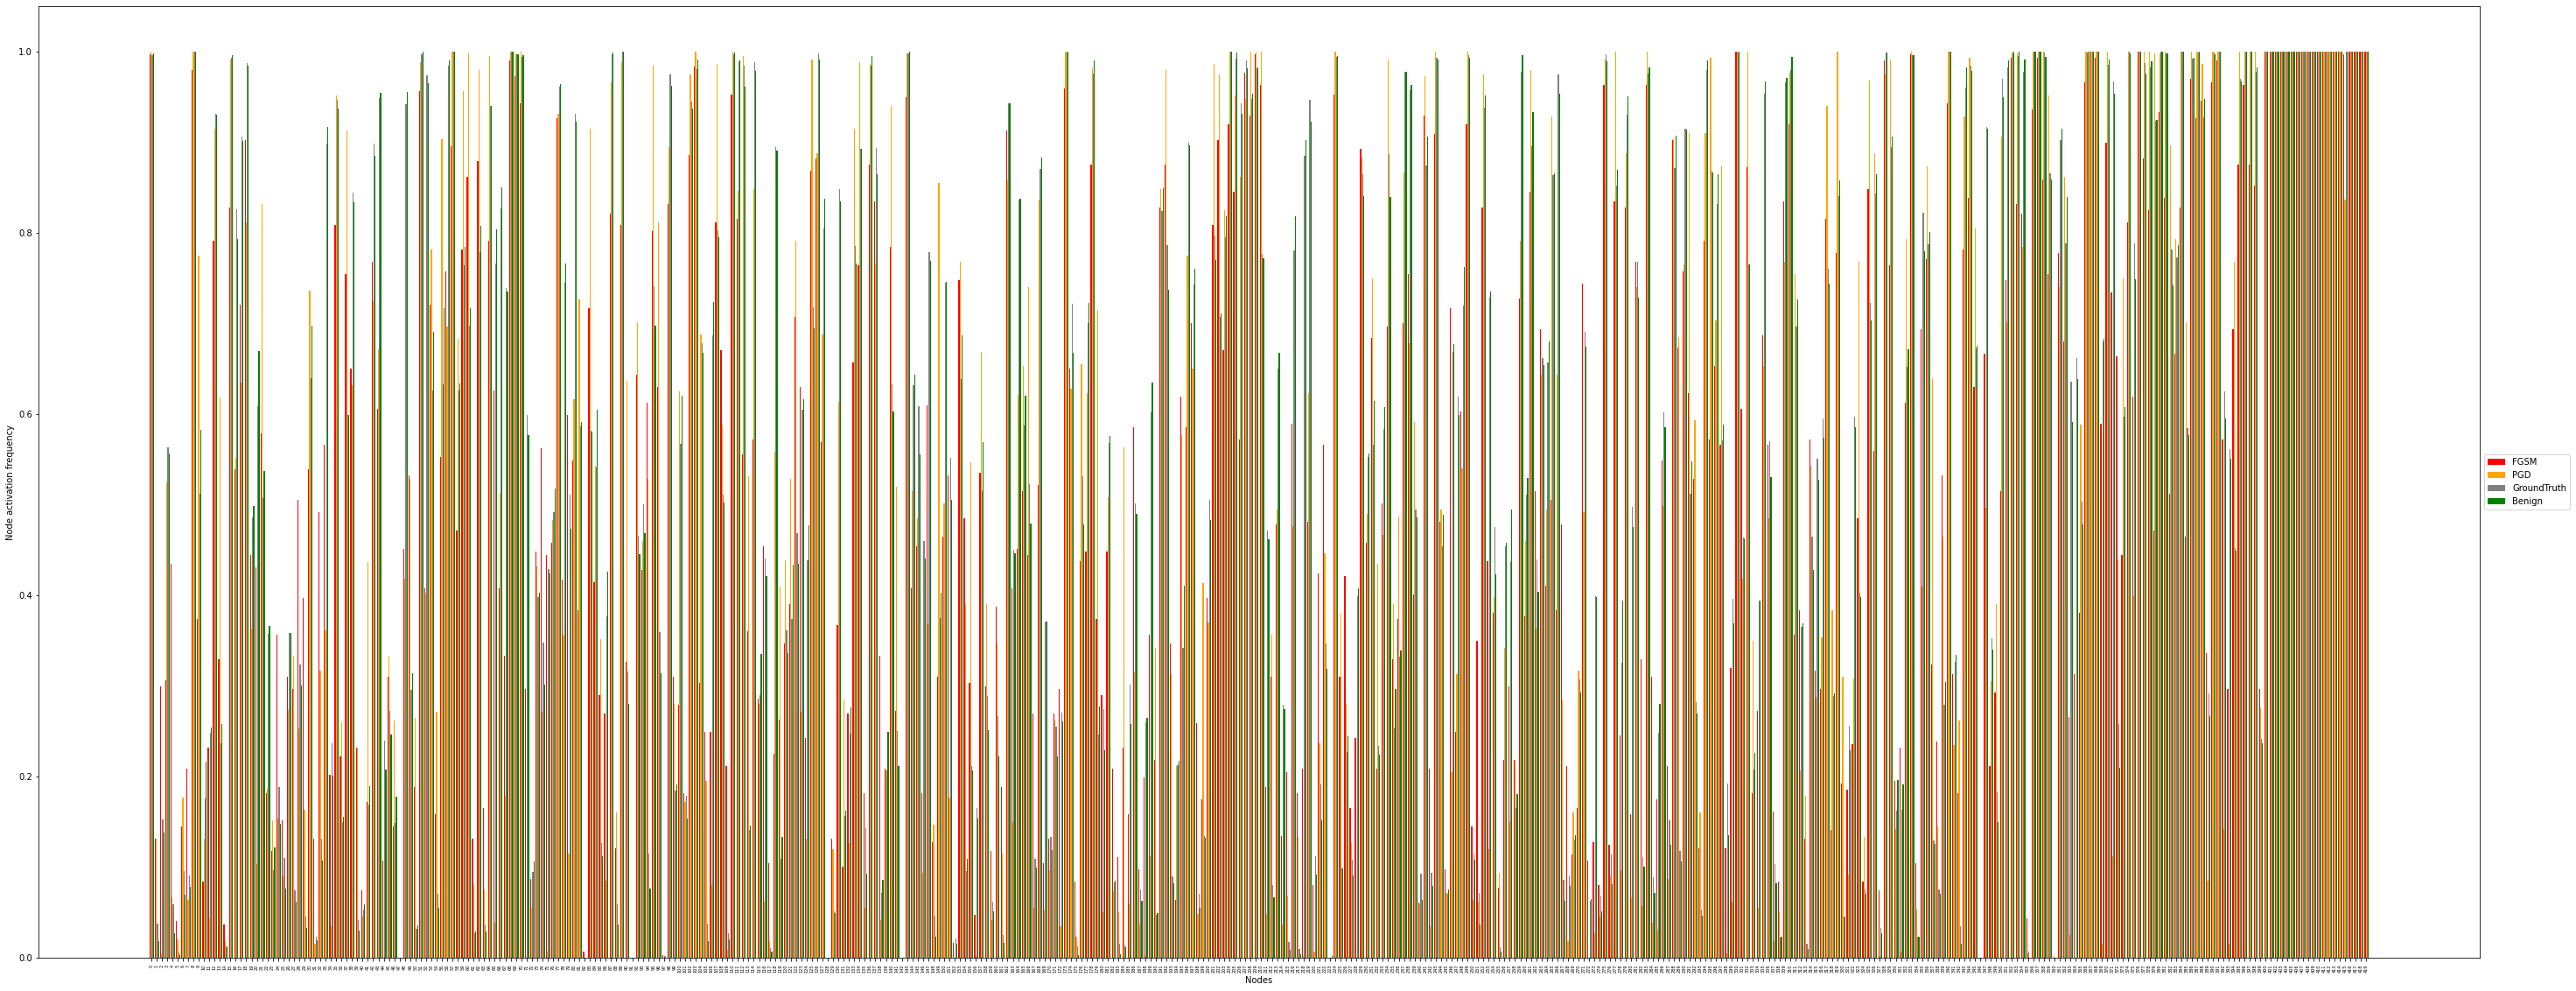

Label=  1
Number of Nodes:  420


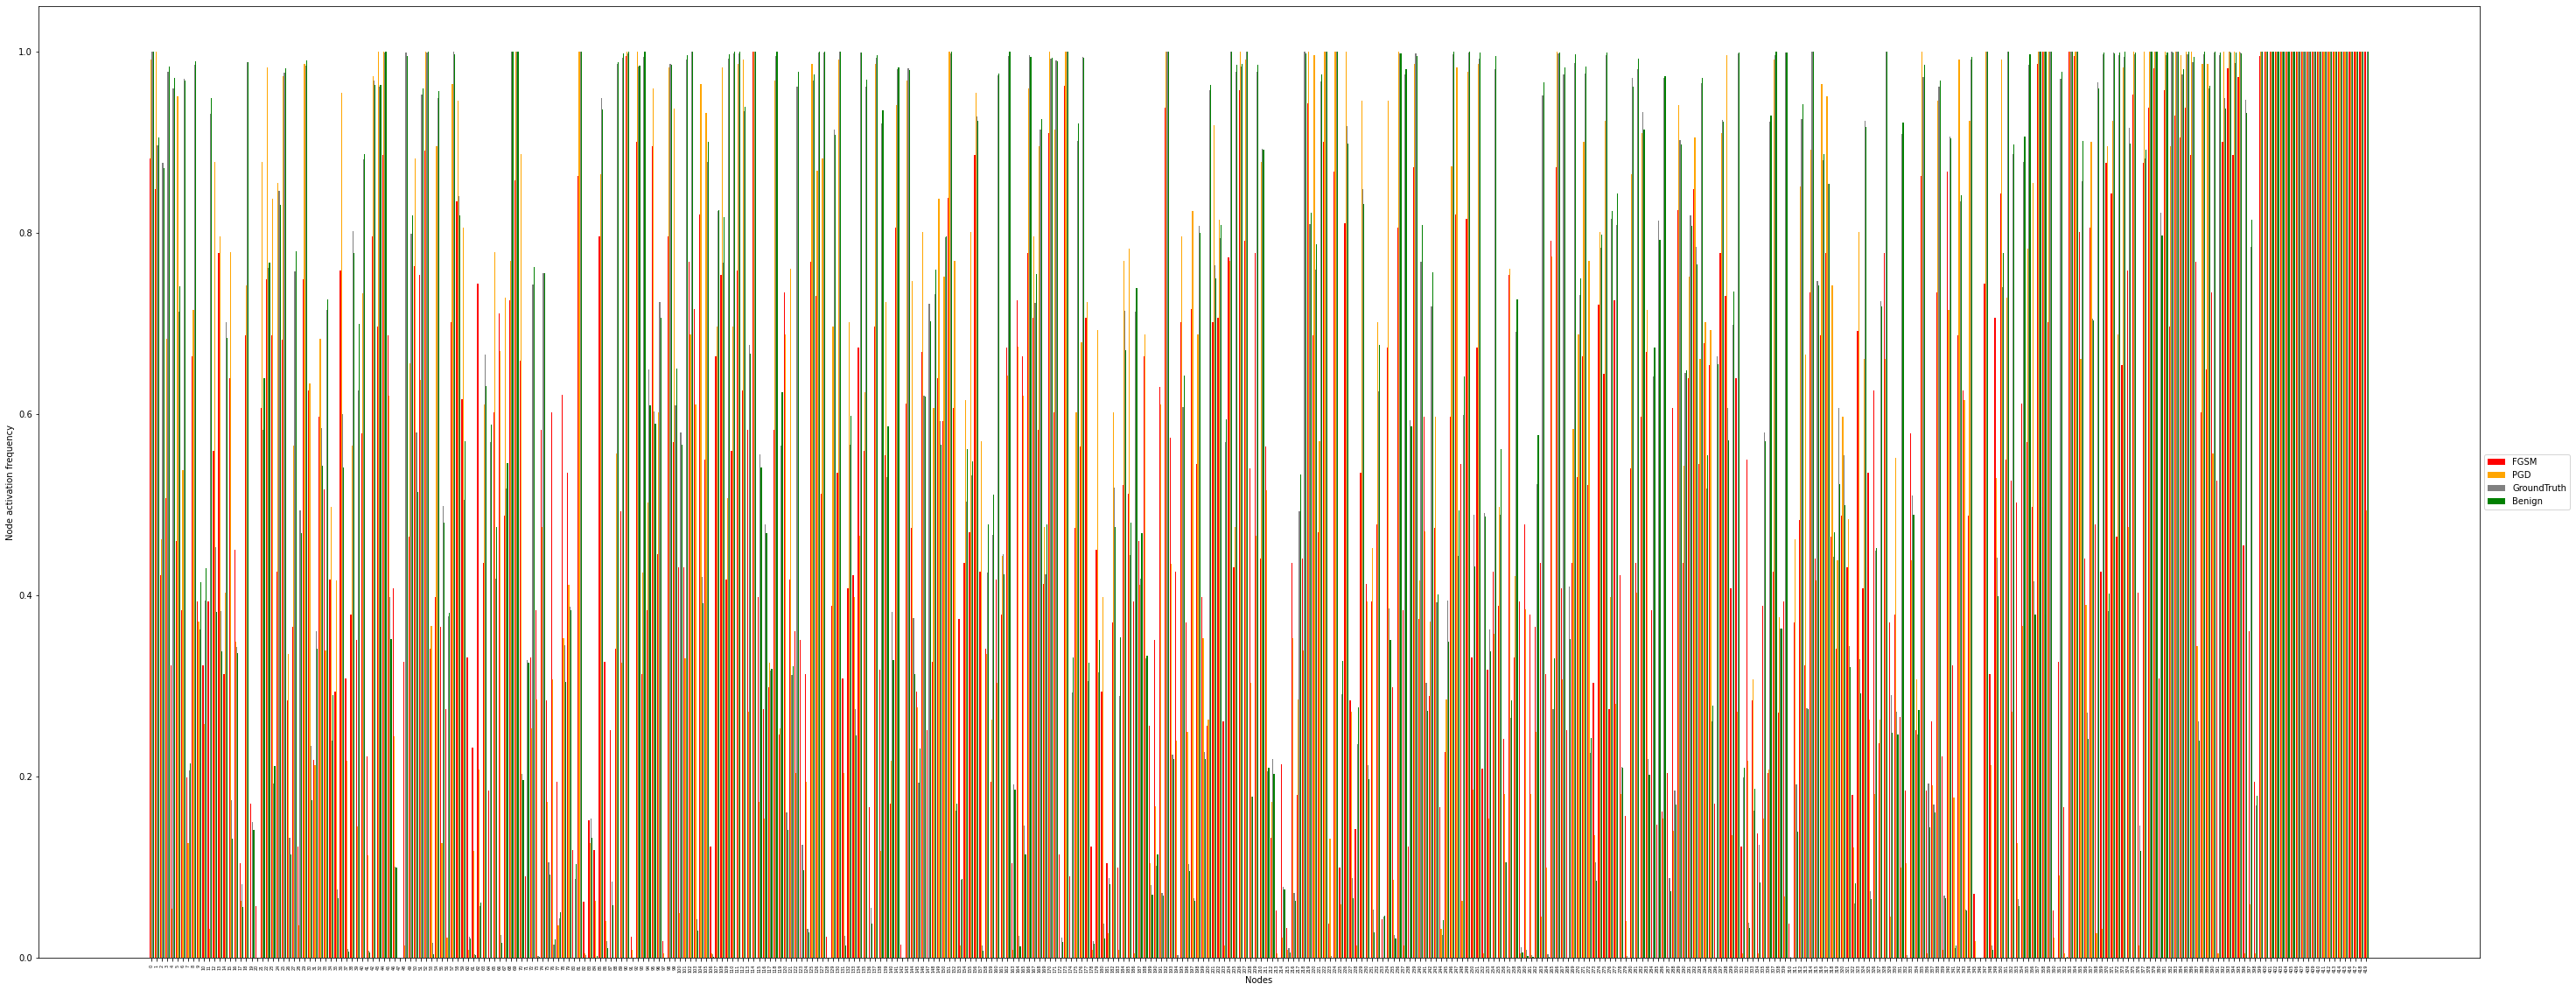

Label=  2
Number of Nodes:  420


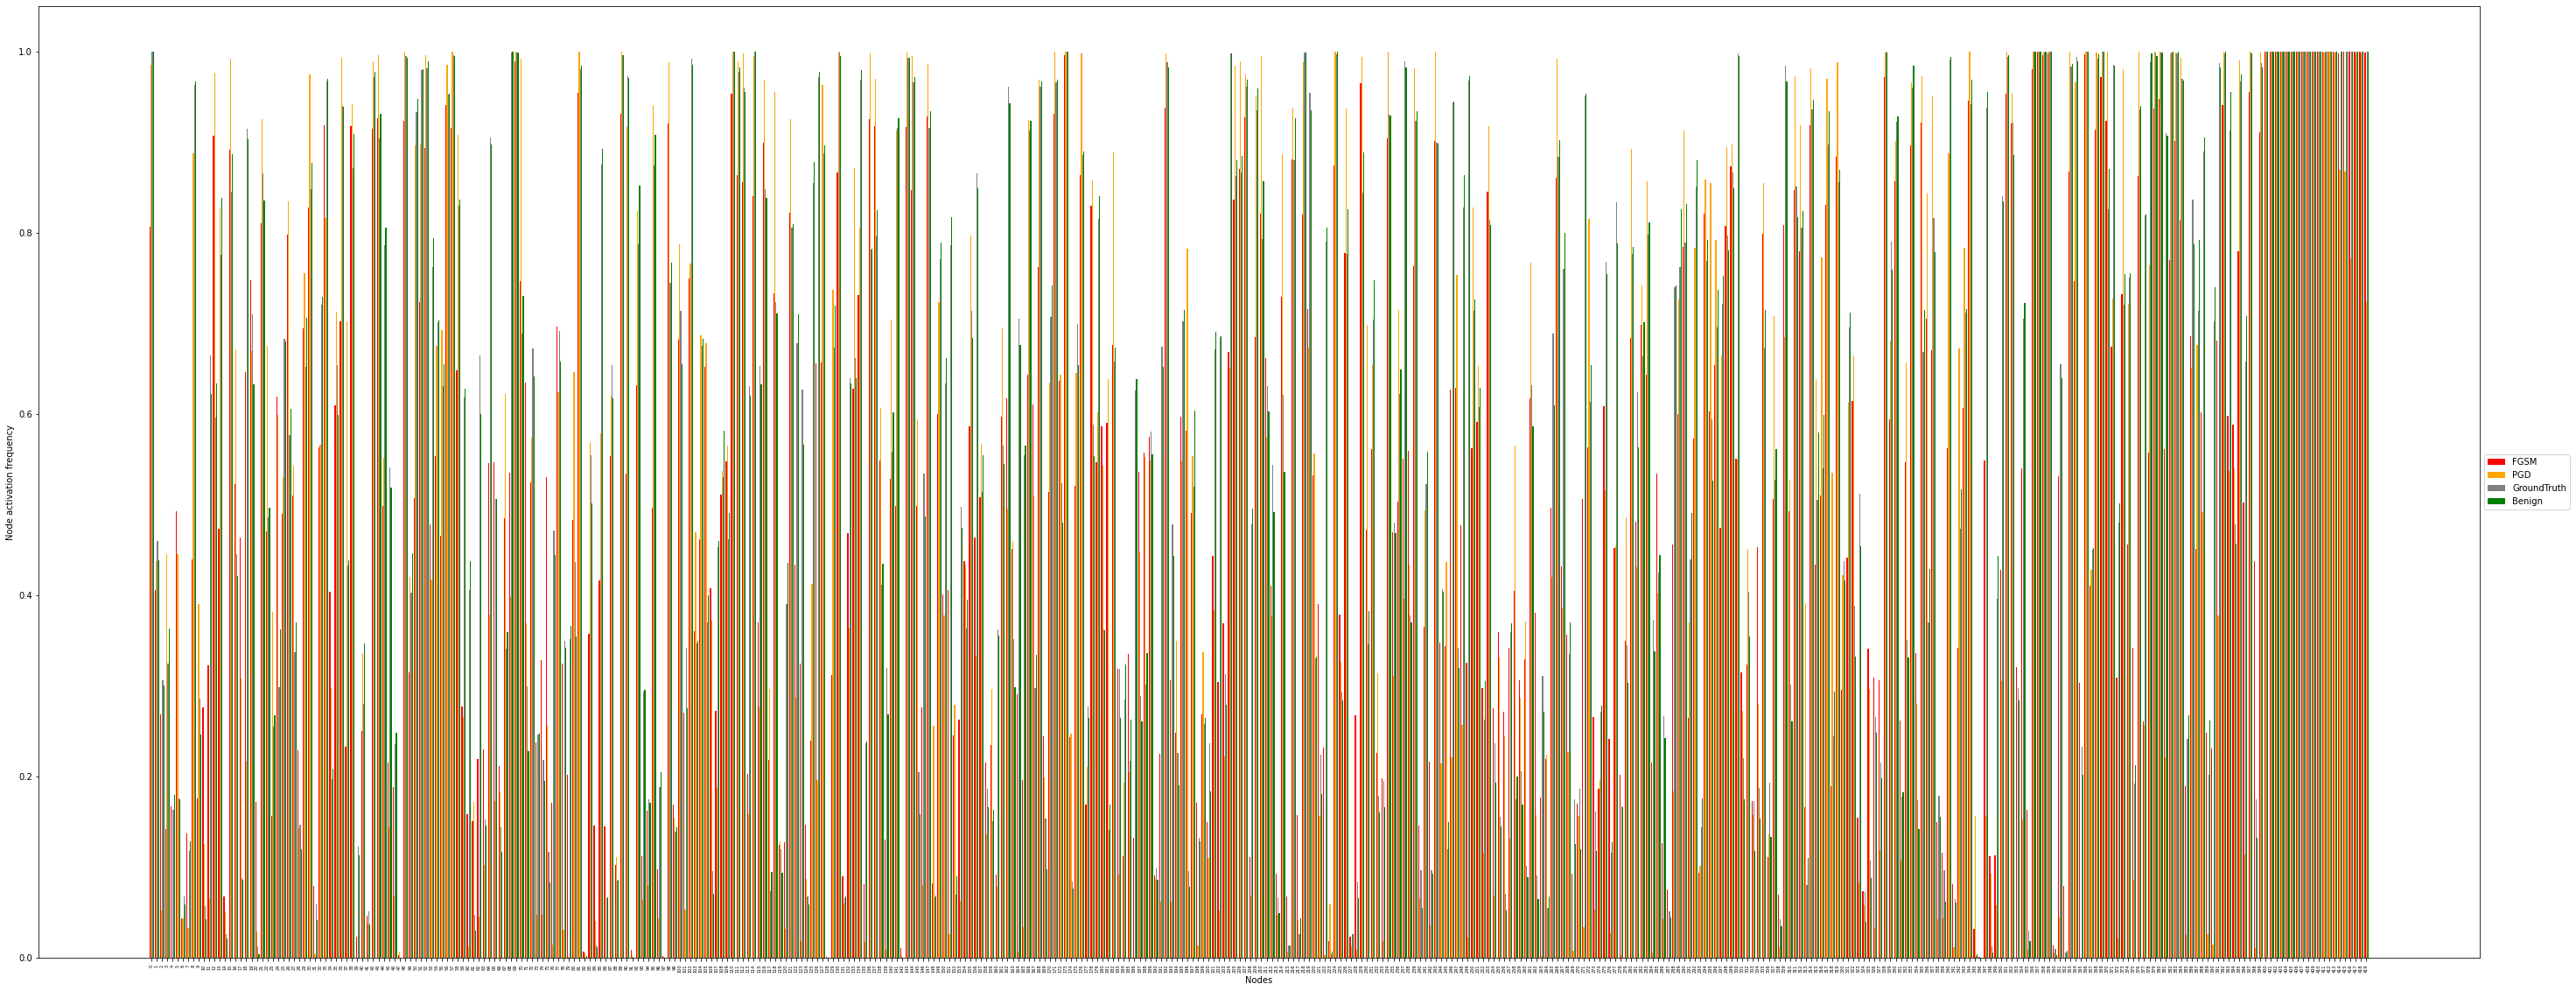

Label=  3
Number of Nodes:  420


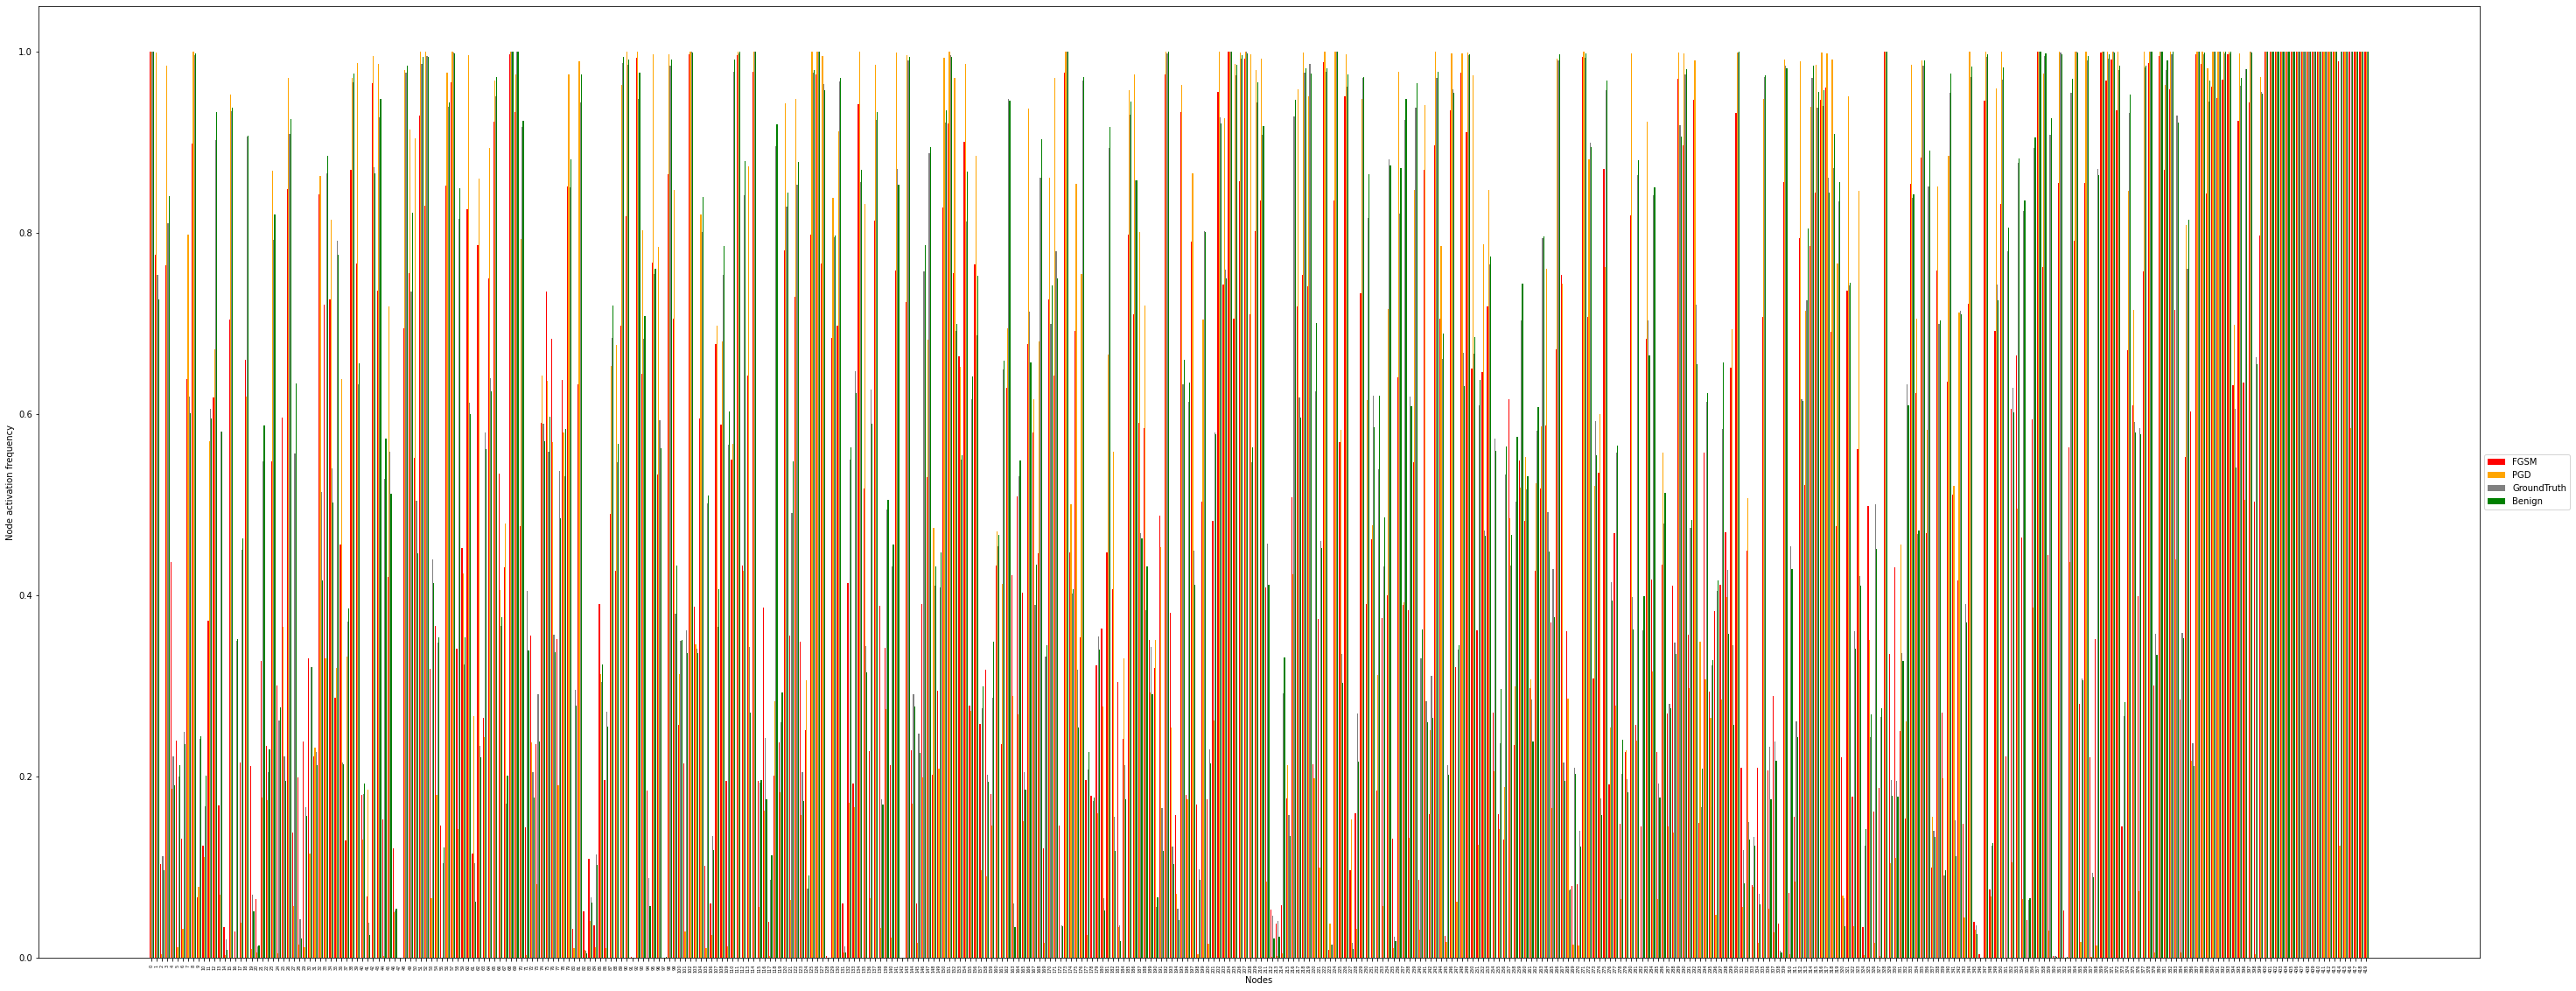

Label=  4
Number of Nodes:  420


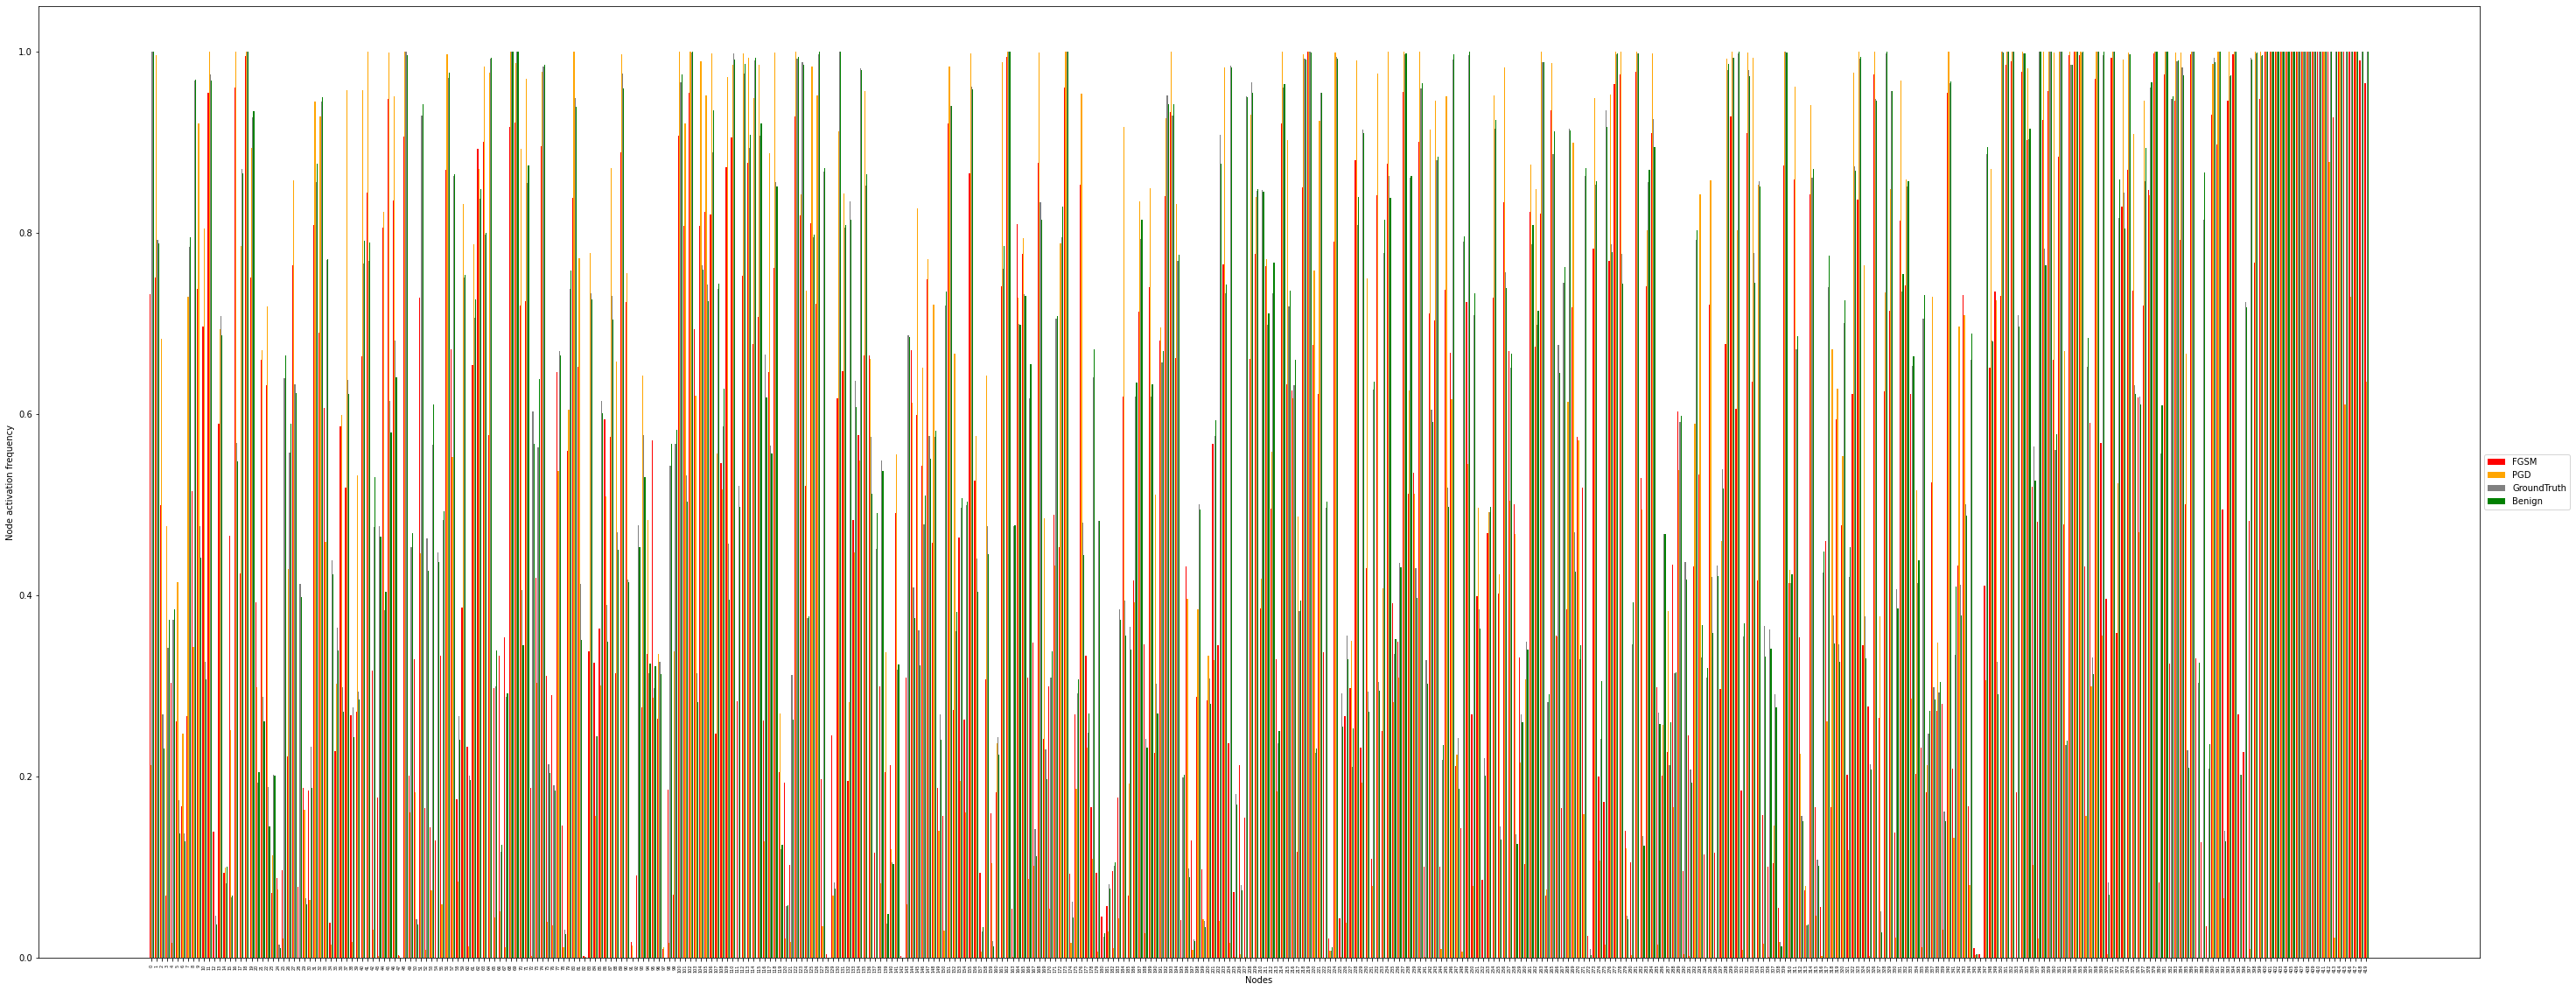

Label=  5
Number of Nodes:  420


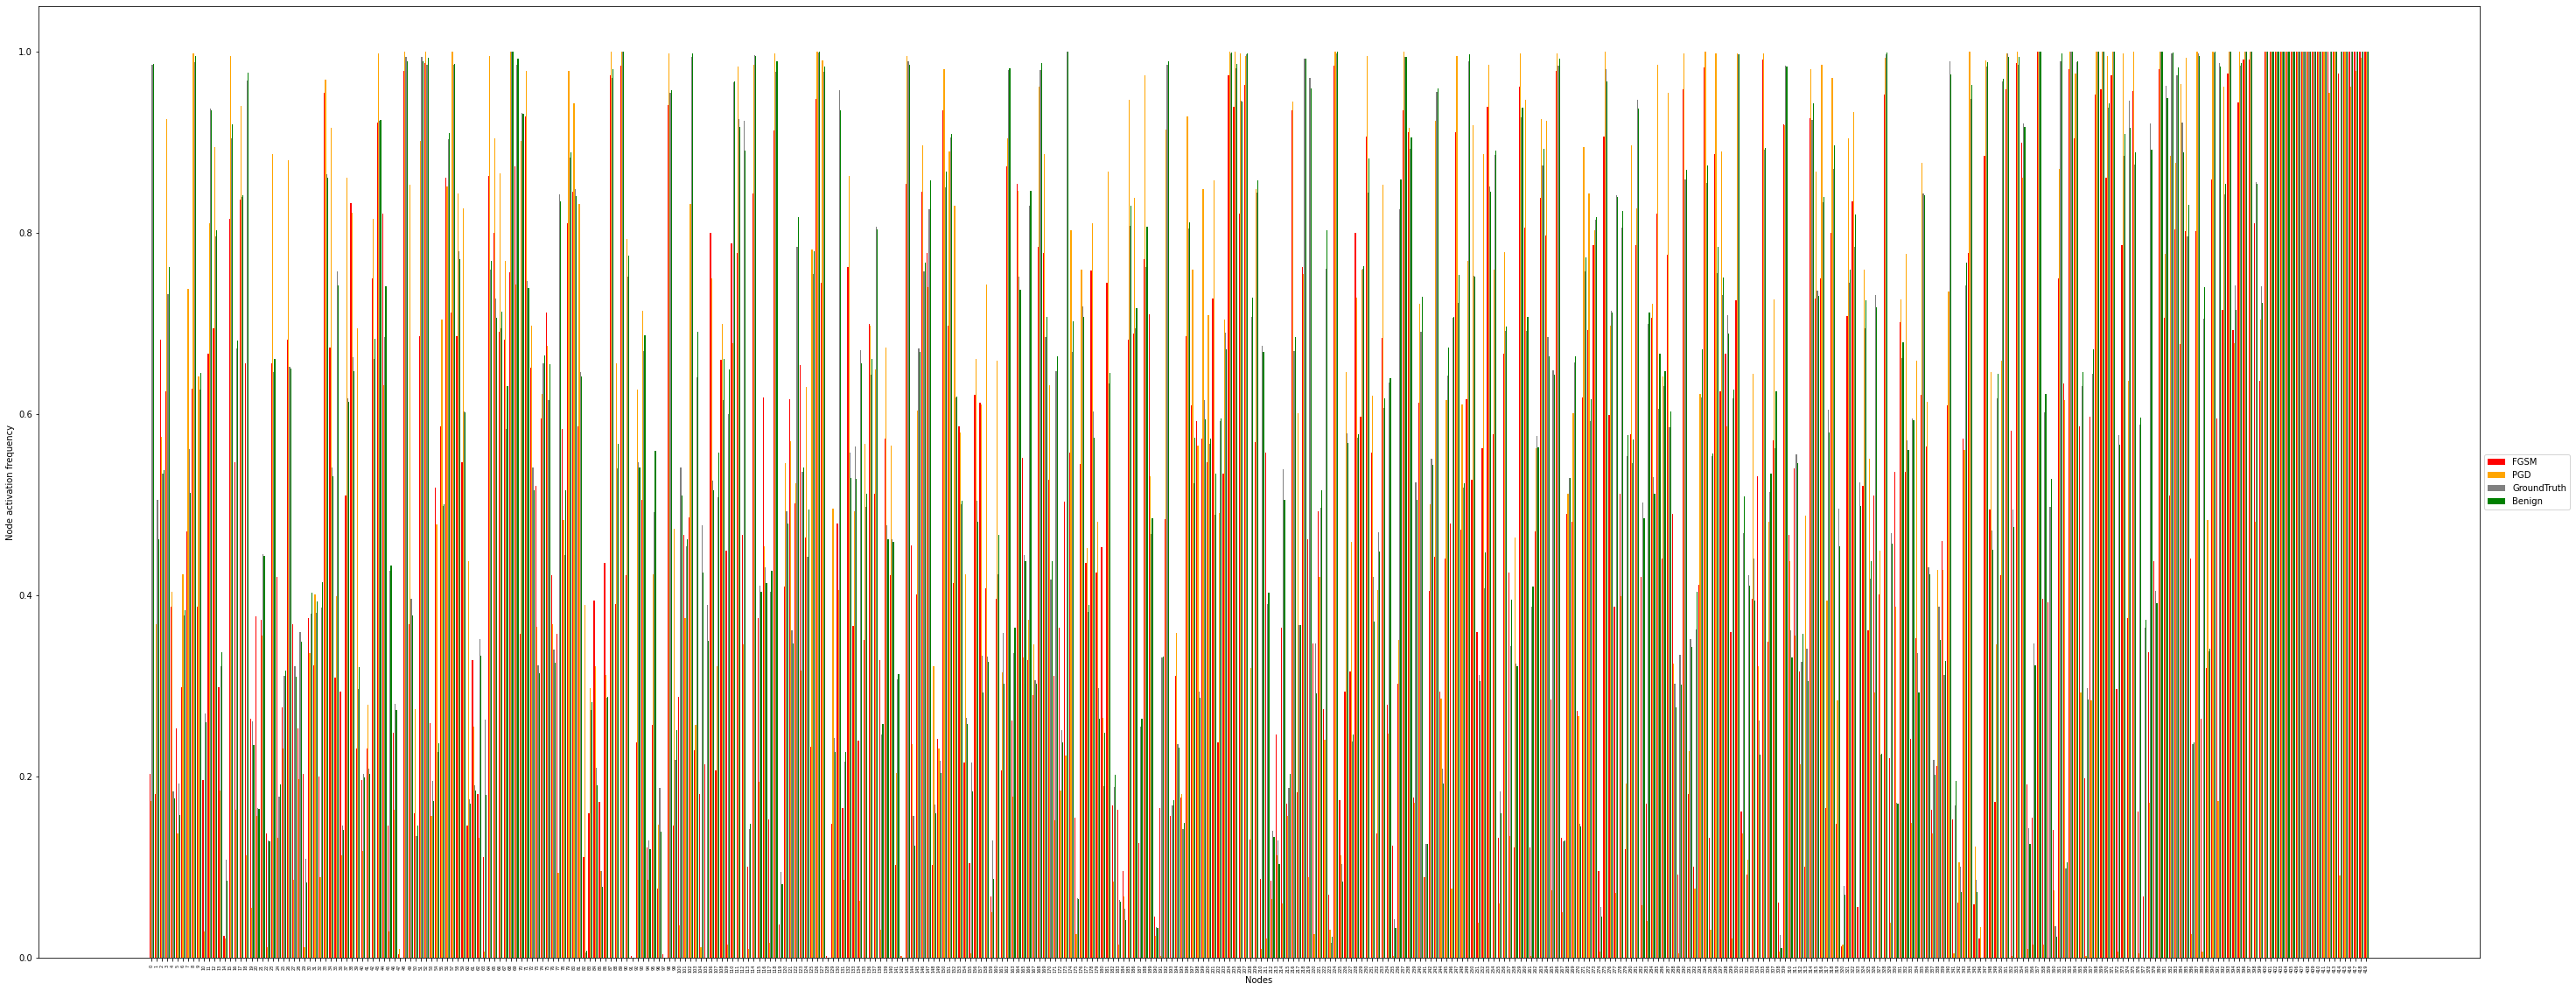

Label=  6
Number of Nodes:  420


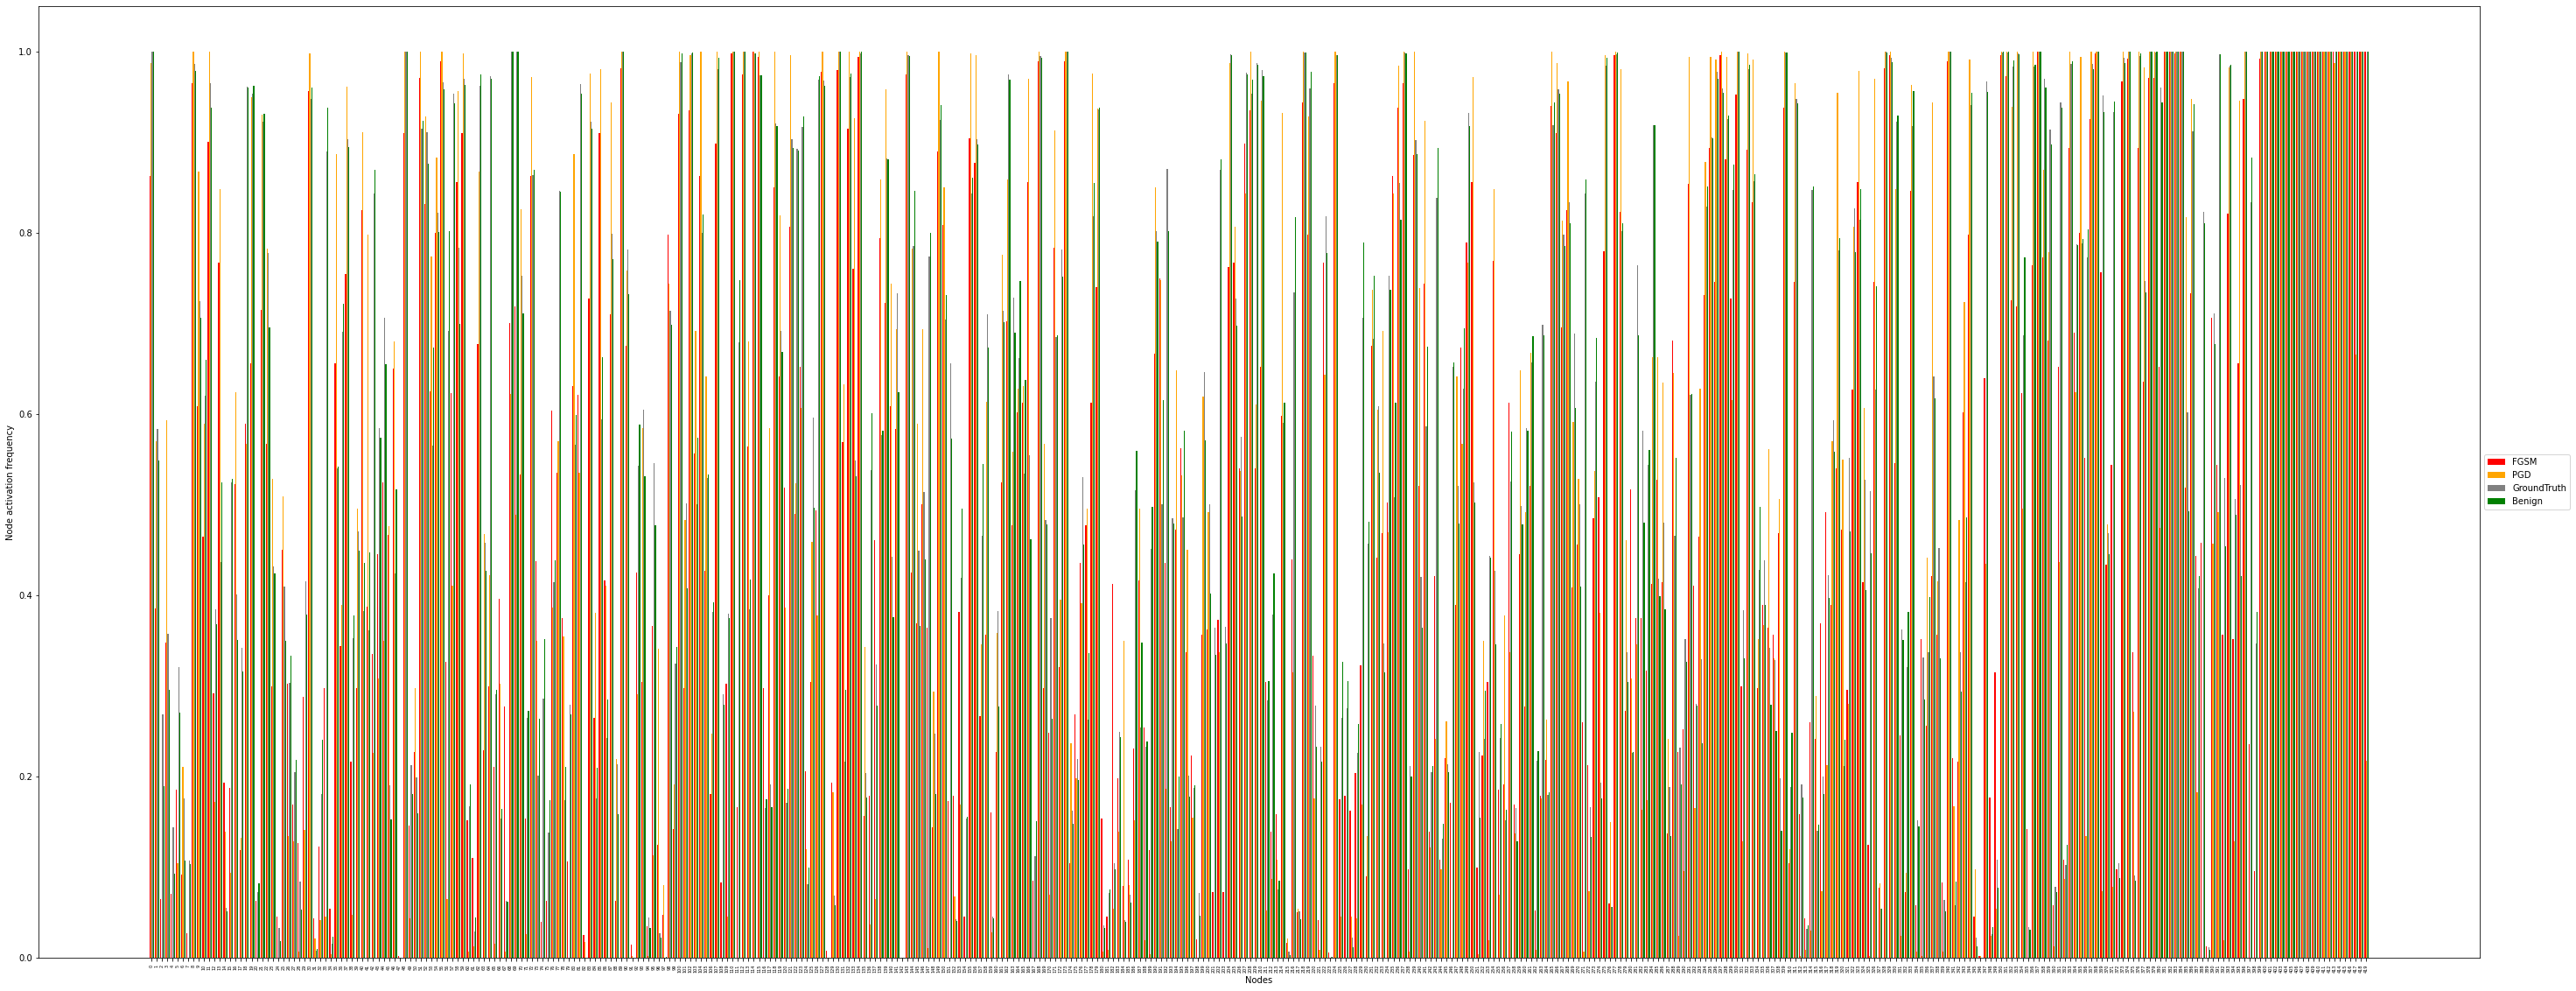

Label=  7
Number of Nodes:  420


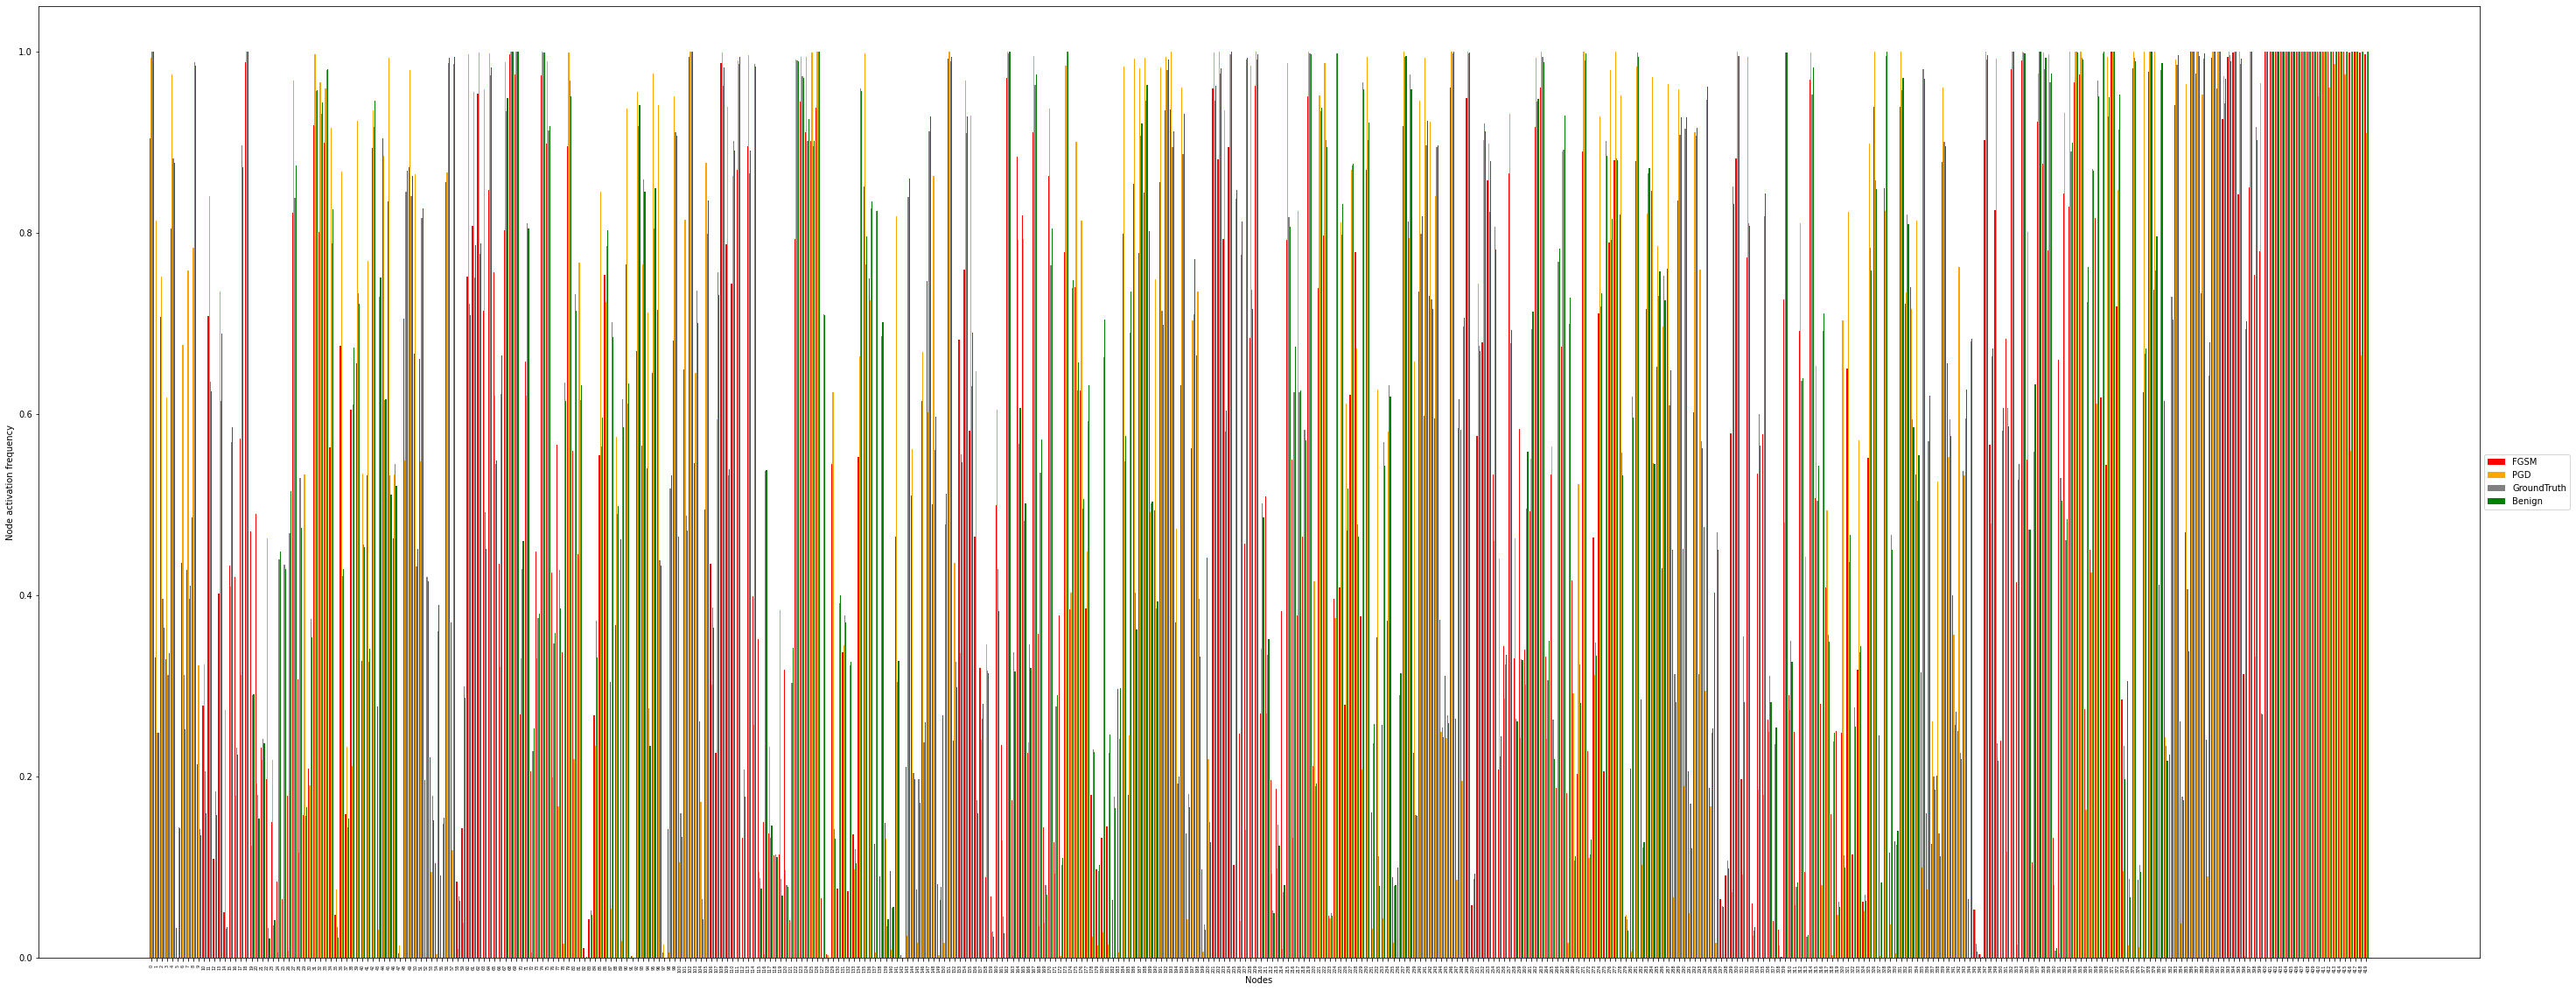

Label=  8
Number of Nodes:  420


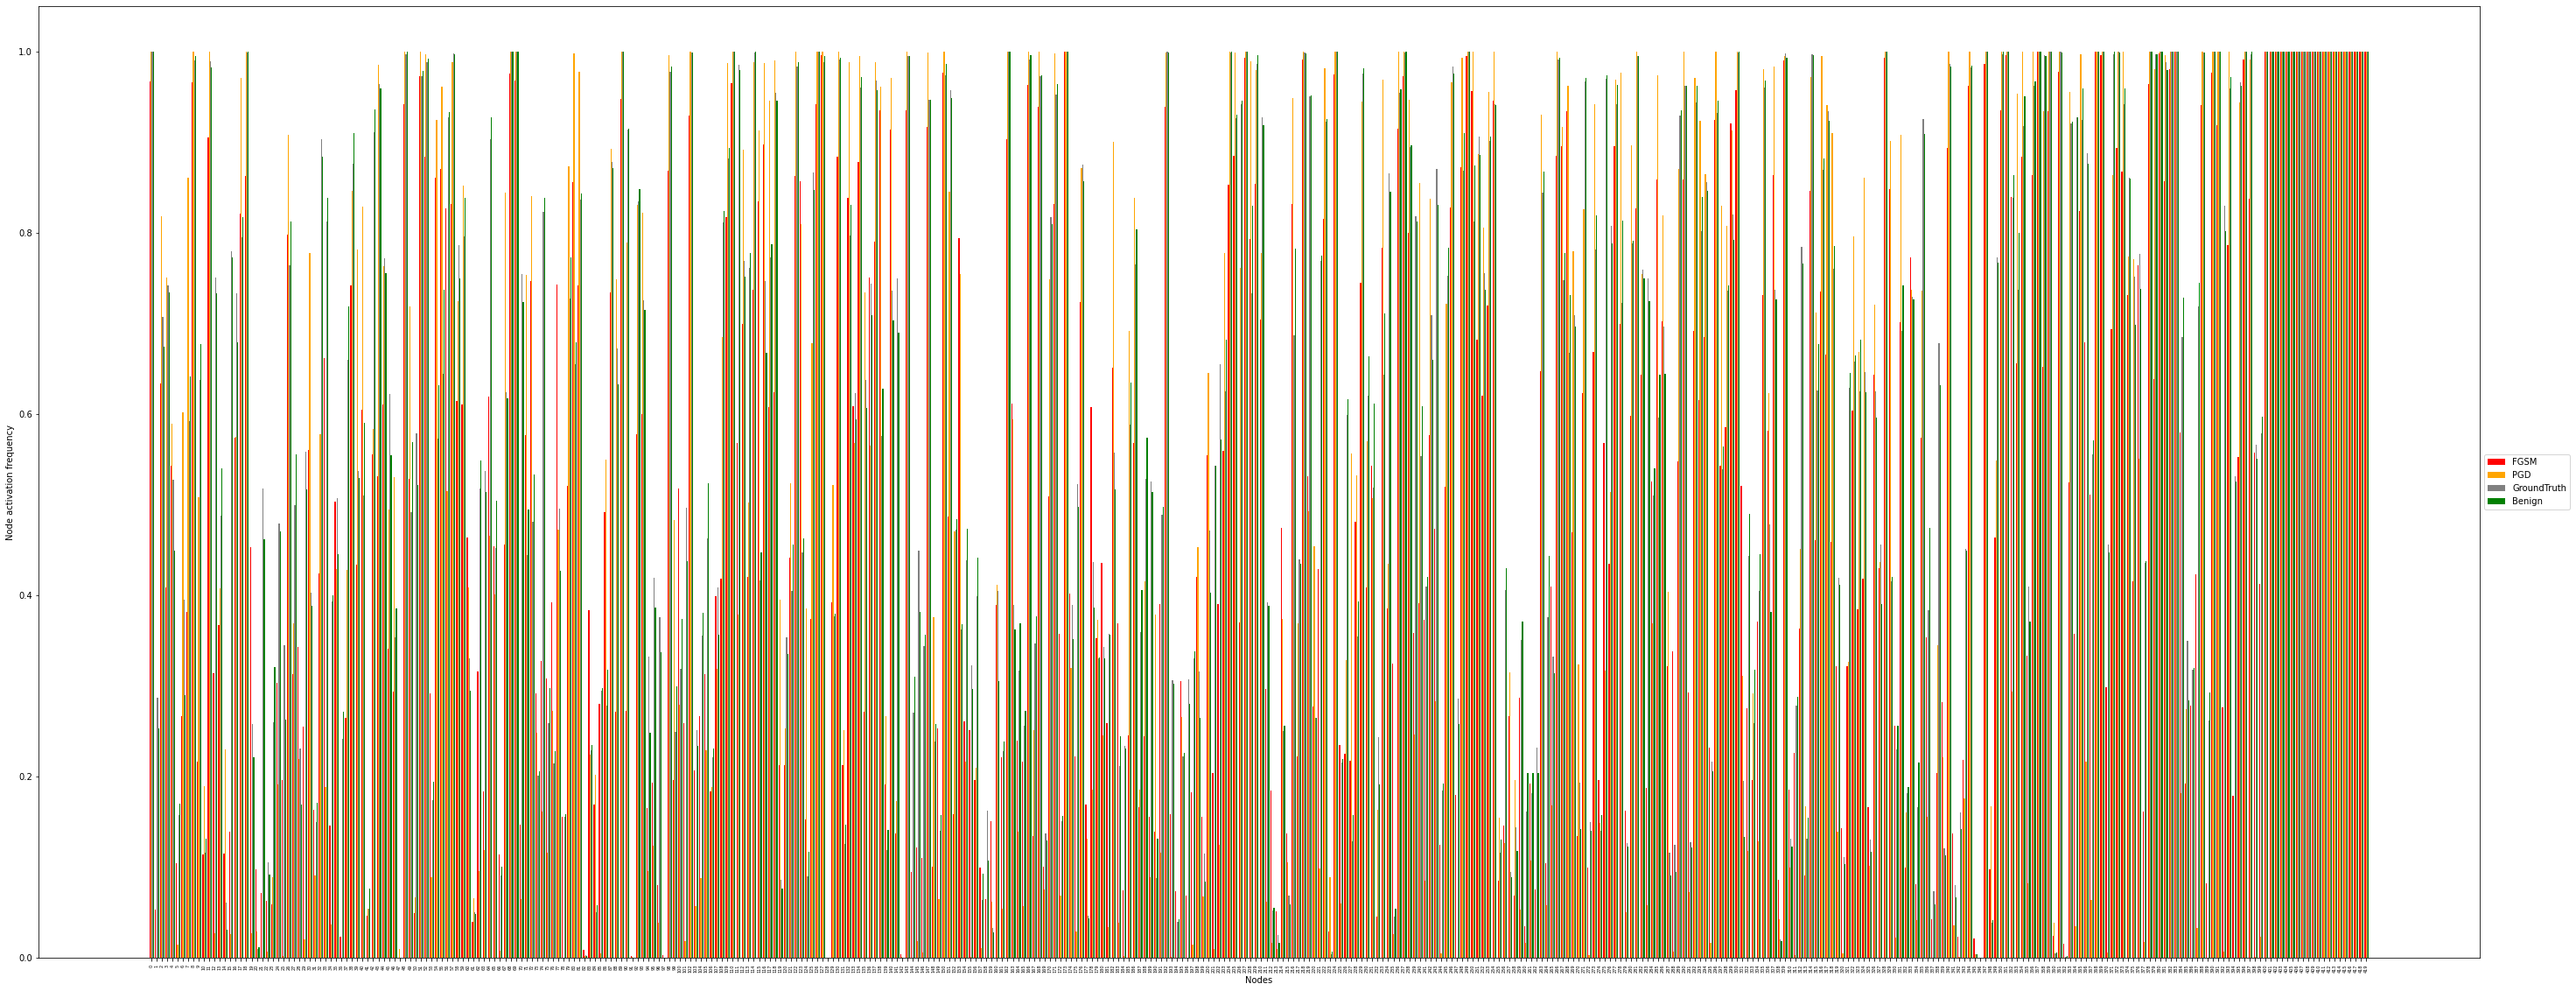

Label=  9
Number of Nodes:  420


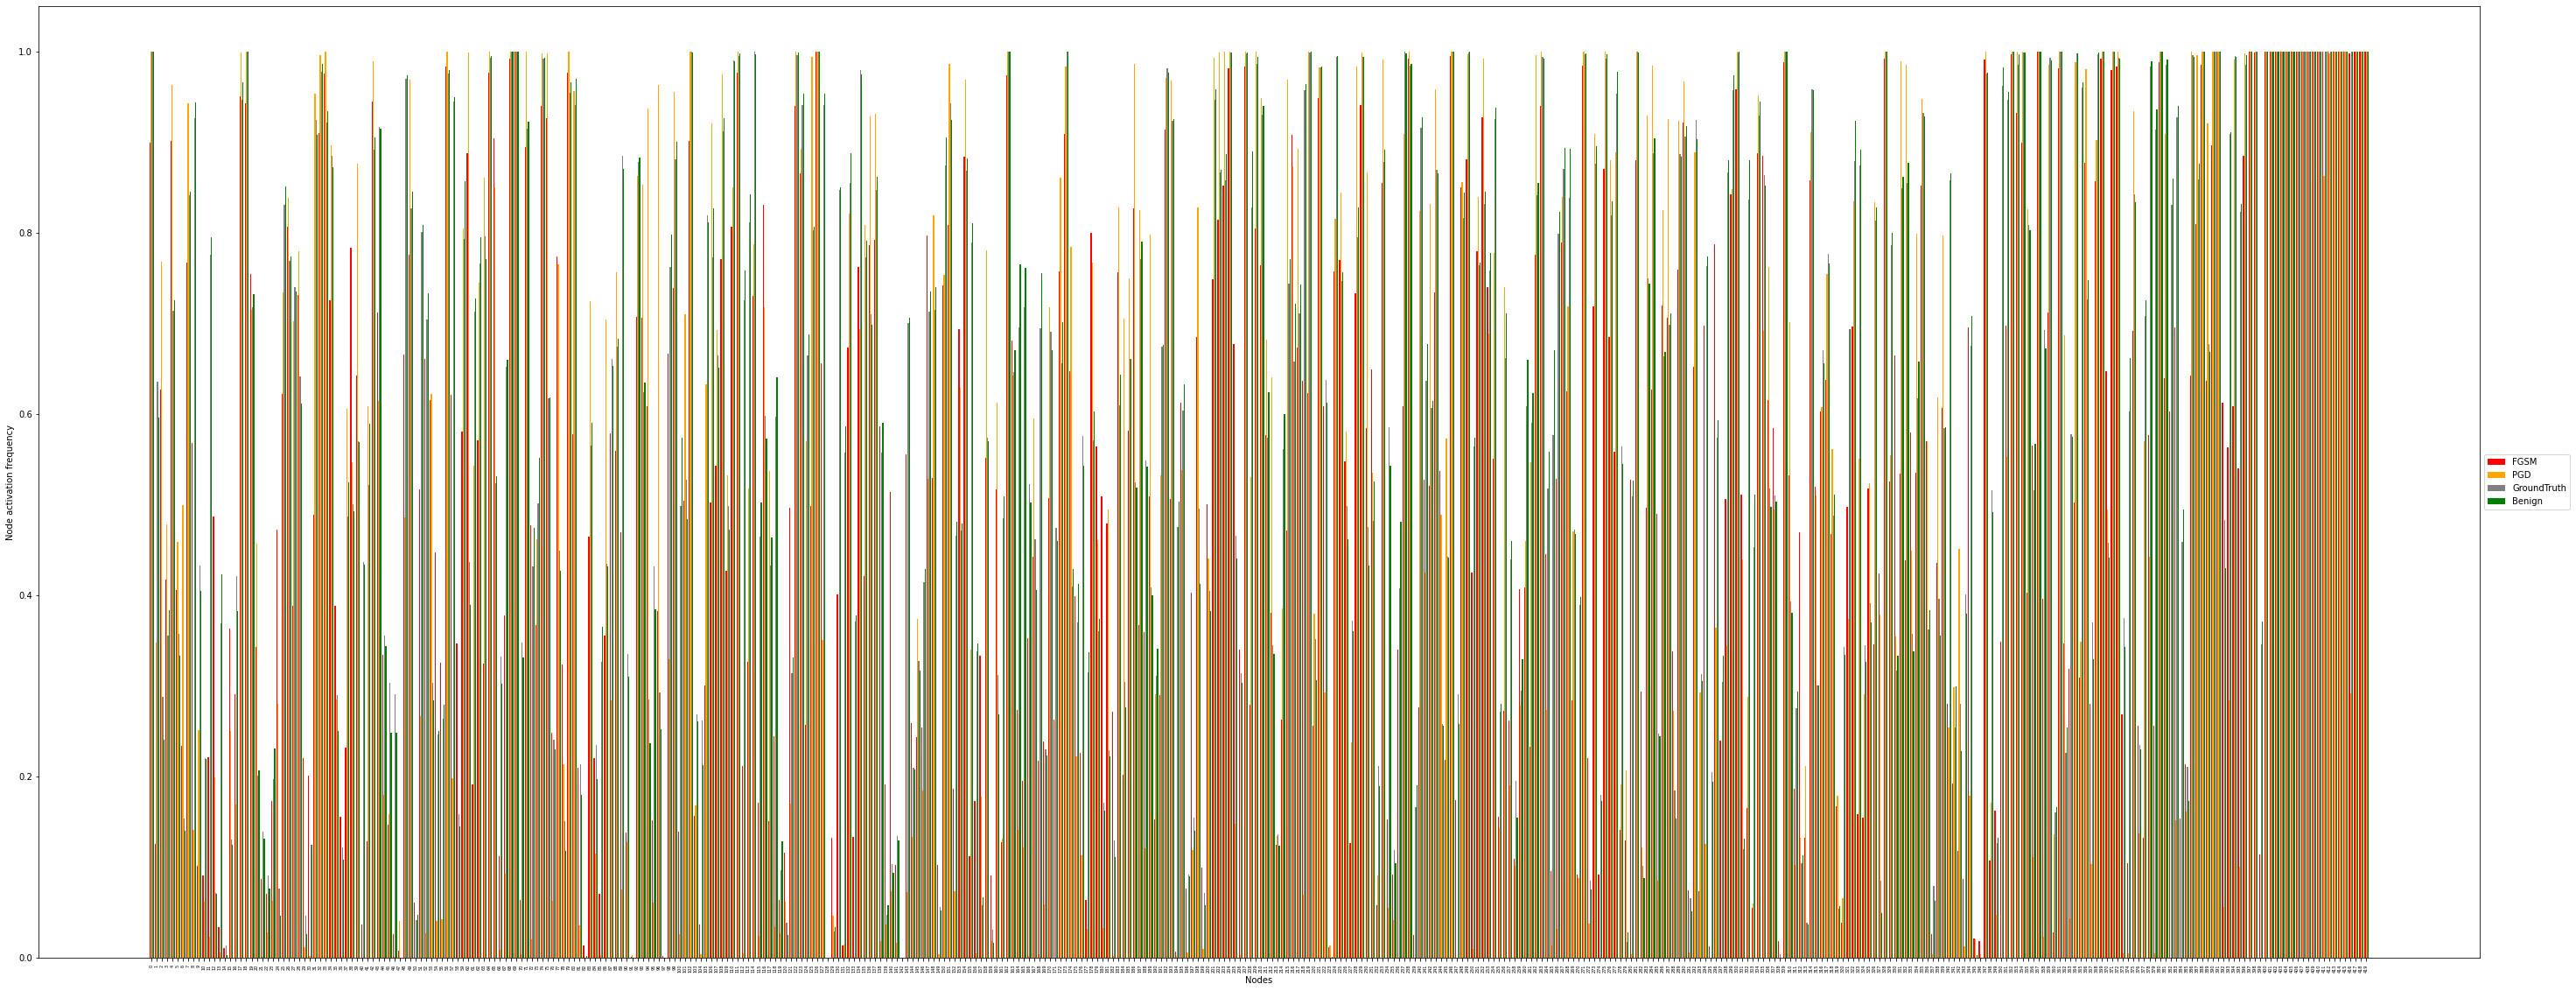

In [9]:
import numpy as np
for i in range(PRED_RANGE):
    adv=[np.array(FGSM['G'][i]), np.array(PGD['G'][i])]
    print('Label= ',i)
    plotAcrossNodes(np.array(gt['G'][i]),'Node activation frequency',np.array(ben['G'][i]),adv,Node_range=len(PGD['G'][i]),data=data,label=i)
    


## The Average Activations Weight

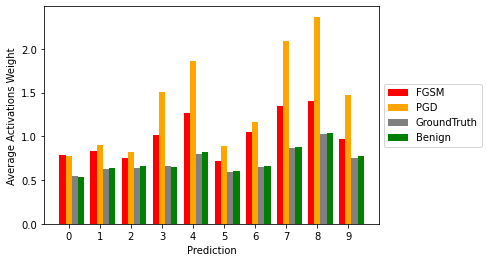

In [10]:
adv=[FGSM['E'], PGD['E']]
plotAcrossPredictions(gt['E'],'Average Activations Weight',ben['E'],adv,PRED_RANGE,data)

## The Dispersation Index

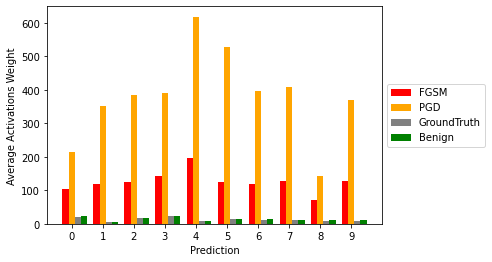

In [11]:
adv=[FGSM['H'], PGD['H']]
plotAcrossPredictions(gt['H'],'Average Activations Weight',ben['H'],adv,PRED_RANGE,data)

## The Entropy Index

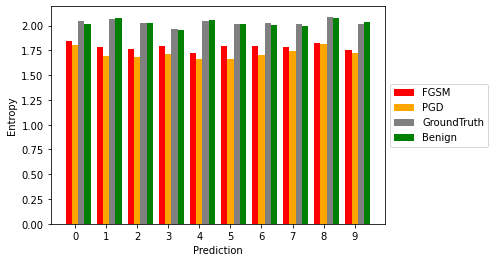

In [12]:
adv=[FGSM['I'], PGD['I']]
plotAcrossPredictions(gt['I'],'Entropy',ben['I'],adv,PRED_RANGE,data)